## Telecom Churn Case Study - Shailesh and Vivek

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

### Step 1: Importing the Dataset

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing all datasets
churn_data = pd.read_csv("telecom_churn_data.csv")
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


### Step 2: Inspecting the Dataframe

In [4]:
# Let's check the dimensions of the dataframe
churn_data.shape

(99999, 226)

In [5]:
# let's look at the statistical aspects of the dataframe
churn_data.describe(include = 'all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,99999,99398,98899,98340,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.001207e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,282.987358,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,328.439770,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-2258.709000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,93.411500,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,197.704000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,371.060000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000


In [6]:
# Let's see the type of each column
print(churn_data.info(verbose = True, null_counts = False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [7]:
# Take a Backup of the Data 
churn_data_backup = churn_data
churn_data_backup.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [8]:
# Let's see the type of each column
churn_data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [9]:
# Check the count of Null Values in the Dataset
churn_data.isnull().sum().sort_values(ascending = False)


count_rech_2g_6             74846
date_of_last_rech_data_6    74846
count_rech_3g_6             74846
av_rech_amt_data_6          74846
max_rech_data_6             74846
total_rech_data_6           74846
arpu_3g_6                   74846
arpu_2g_6                   74846
night_pck_user_6            74846
fb_user_6                   74846
arpu_3g_7                   74428
count_rech_2g_7             74428
fb_user_7                   74428
count_rech_3g_7             74428
arpu_2g_7                   74428
av_rech_amt_data_7          74428
max_rech_data_7             74428
night_pck_user_7            74428
total_rech_data_7           74428
date_of_last_rech_data_7    74428
night_pck_user_9            74077
date_of_last_rech_data_9    74077
fb_user_9                   74077
arpu_2g_9                   74077
max_rech_data_9             74077
arpu_3g_9                   74077
total_rech_data_9           74077
av_rech_amt_data_9          74077
count_rech_3g_9             74077
count_rech_2g_

In [10]:
# Check the % of Records which is null

round(100*churn_data.isnull().sum()/len(churn_data.index),2).sort_values(ascending = False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

### Step 3: Data Cleansing

In [11]:
# Describe the column

churn_data.describe(include=[np.number])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [12]:
# Describe Selected columns

churn_data[['arpu_6','arpu_7','arpu_8']].describe()

,arpu_6,arpu_7,arpu_8
count,99999.000000,99999.000000,99999.000000
mean,282.987358,278.536648,279.154731
std,328.439770,338.156291,344.474791
min,-2258.709000,-2014.045000,-945.808000
25%,93.411500,86.980500,84.126000
50%,197.704000,191.640000,192.080000
75%,371.060000,365.344500,369.370500
max,27731.088000,35145.834000,33543.624000


In [13]:
# Describe Selected columns

churn_data[['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].describe()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou
count,99999.0,98981.0,98981.0,98981.0
mean,109.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0
min,109.0,0.0,0.0,0.0
25%,109.0,0.0,0.0,0.0
50%,109.0,0.0,0.0,0.0
75%,109.0,0.0,0.0,0.0
max,109.0,0.0,0.0,0.0


In [14]:
# Drop the Column with less Unique Values
churn_data.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'], axis = 1, inplace = True)

In [15]:
# Examine the dataframe
churn_data.head()

,mobile_number,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [16]:
# Renaming Column Names for better understanding

churn_data.rename(columns={'last_date_of_month_6': 'June', 'last_date_of_month_7' : 'July', 'last_date_of_month_8' : 'August', 'last_date_of_month_9':'September'}, inplace=True)


In [17]:
# Examine the dataframe
churn_data.head()

,mobile_number,June,July,August,September,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [18]:
# Impute the nulls with  0

churn_data.loc[pd.isnull(churn_data['arpu_7']),['arpu_7']] = 0
churn_data.loc[pd.isnull(churn_data['arpu_8']),['arpu_8']] = 0
churn_data.loc[pd.isnull(churn_data['arpu_9']),['arpu_9']] = 0
churn_data.loc[pd.isnull(churn_data['onnet_mou_6']),['onnet_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['onnet_mou_7']),['onnet_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['onnet_mou_8']),['onnet_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['onnet_mou_9']),['onnet_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['offnet_mou_6']),['offnet_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['offnet_mou_7']),['offnet_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['offnet_mou_8']),['offnet_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['offnet_mou_9']),['offnet_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['roam_ic_mou_6']),['roam_ic_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['roam_ic_mou_7']),['roam_ic_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['roam_ic_mou_8']),['roam_ic_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['roam_ic_mou_9']),['roam_ic_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['roam_og_mou_6']),['roam_og_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['roam_og_mou_7']),['roam_og_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['roam_og_mou_8']),['roam_og_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['roam_og_mou_9']),['roam_og_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['loc_og_t2t_mou_6']),['loc_og_t2t_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['loc_og_t2t_mou_7']),['loc_og_t2t_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['loc_og_t2t_mou_8']),['loc_og_t2t_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['loc_og_t2t_mou_9']),['loc_og_t2t_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['loc_og_t2m_mou_6']),['loc_og_t2m_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['loc_og_t2m_mou_7']),['loc_og_t2m_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['loc_og_t2m_mou_8']),['loc_og_t2m_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['loc_og_t2m_mou_9']),['loc_og_t2m_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['loc_og_t2f_mou_6']),['loc_og_t2f_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['loc_og_t2f_mou_7']),['loc_og_t2f_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['loc_og_t2f_mou_8']),['loc_og_t2f_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['loc_og_t2f_mou_9']),['loc_og_t2f_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['loc_og_t2c_mou_6']),['loc_og_t2c_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['loc_og_t2c_mou_7']),['loc_og_t2c_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['loc_og_t2c_mou_8']),['loc_og_t2c_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['loc_og_t2c_mou_9']),['loc_og_t2c_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['loc_og_mou_6']),['loc_og_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['loc_og_mou_7']),['loc_og_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['loc_og_mou_8']),['loc_og_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['loc_og_mou_9']),['loc_og_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['std_og_t2t_mou_6']),['std_og_t2t_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['std_og_t2t_mou_7']),['std_og_t2t_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['std_og_t2t_mou_8']),['std_og_t2t_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['std_og_t2t_mou_9']),['std_og_t2t_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['std_og_t2m_mou_6']),['std_og_t2m_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['std_og_t2m_mou_7']),['std_og_t2m_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['std_og_t2m_mou_8']),['std_og_t2m_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['std_og_t2m_mou_9']),['std_og_t2m_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['std_og_t2f_mou_6']),['std_og_t2f_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['std_og_t2f_mou_7']),['std_og_t2f_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['std_og_t2f_mou_8']),['std_og_t2f_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['std_og_t2f_mou_9']),['std_og_t2f_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['std_og_t2c_mou_6']),['std_og_t2c_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['std_og_t2c_mou_7']),['std_og_t2c_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['std_og_t2c_mou_8']),['std_og_t2c_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['std_og_t2c_mou_9']),['std_og_t2c_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['std_og_mou_6']),['std_og_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['std_og_mou_7']),['std_og_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['std_og_mou_8']),['std_og_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['std_og_mou_9']),['std_og_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['isd_og_mou_6']),['isd_og_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['isd_og_mou_7']),['isd_og_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['isd_og_mou_8']),['isd_og_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['isd_og_mou_9']),['isd_og_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['spl_og_mou_6']),['spl_og_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['spl_og_mou_7']),['spl_og_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['spl_og_mou_8']),['spl_og_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['spl_og_mou_9']),['spl_og_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['og_others_6']),['og_others_6']] = 0
churn_data.loc[pd.isnull(churn_data['og_others_7']),['og_others_7']] = 0
churn_data.loc[pd.isnull(churn_data['og_others_8']),['og_others_8']] = 0
churn_data.loc[pd.isnull(churn_data['og_others_9']),['og_others_9']] = 0
churn_data.loc[pd.isnull(churn_data['total_og_mou_6']),['total_og_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['total_og_mou_7']),['total_og_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['total_og_mou_8']),['total_og_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['total_og_mou_9']),['total_og_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_t2t_mou_6']),['loc_ic_t2t_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_t2t_mou_7']),['loc_ic_t2t_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_t2t_mou_8']),['loc_ic_t2t_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_t2t_mou_9']),['loc_ic_t2t_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_t2m_mou_6']),['loc_ic_t2m_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_t2m_mou_7']),['loc_ic_t2m_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_t2m_mou_8']),['loc_ic_t2m_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_t2m_mou_9']),['loc_ic_t2m_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_t2f_mou_6']),['loc_ic_t2f_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_t2f_mou_7']),['loc_ic_t2f_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_t2f_mou_8']),['loc_ic_t2f_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_t2f_mou_9']),['loc_ic_t2f_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_mou_6']),['loc_ic_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_mou_7']),['loc_ic_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_mou_8']),['loc_ic_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_mou_9']),['loc_ic_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2t_mou_6']),['std_ic_t2t_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2t_mou_7']),['std_ic_t2t_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2t_mou_8']),['std_ic_t2t_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2t_mou_9']),['std_ic_t2t_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2m_mou_6']),['std_ic_t2m_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2m_mou_7']),['std_ic_t2m_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2m_mou_8']),['std_ic_t2m_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2m_mou_9']),['std_ic_t2m_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2f_mou_6']),['std_ic_t2f_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2f_mou_7']),['std_ic_t2f_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2f_mou_8']),['std_ic_t2f_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2f_mou_9']),['std_ic_t2f_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2o_mou_6']),['std_ic_t2o_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2o_mou_7']),['std_ic_t2o_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2o_mou_8']),['std_ic_t2o_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2o_mou_9']),['std_ic_t2o_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_mou_6']),['std_ic_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_mou_7']),['std_ic_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_mou_8']),['std_ic_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_mou_9']),['std_ic_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['total_ic_mou_6']),['total_ic_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['total_ic_mou_7']),['total_ic_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['total_ic_mou_8']),['total_ic_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['total_ic_mou_9']),['total_ic_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['spl_ic_mou_6']),['spl_ic_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['spl_ic_mou_7']),['spl_ic_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['spl_ic_mou_8']),['spl_ic_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['spl_ic_mou_9']),['spl_ic_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['isd_ic_mou_6']),['isd_ic_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['isd_ic_mou_7']),['isd_ic_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['isd_ic_mou_8']),['isd_ic_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['isd_ic_mou_9']),['isd_ic_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['ic_others_6']),['ic_others_6']] = 0
churn_data.loc[pd.isnull(churn_data['ic_others_7']),['ic_others_7']] = 0
churn_data.loc[pd.isnull(churn_data['ic_others_8']),['ic_others_8']] = 0
churn_data.loc[pd.isnull(churn_data['ic_others_9']),['ic_others_9']] = 0


In [19]:
# Check the % of Records which is null

round(100*churn_data.isnull().sum()/len(churn_data.index),2).sort_values(ascending = False)

total_rech_data_6           74.85
count_rech_3g_6             74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
arpu_3g_6                   74.85
av_rech_amt_data_6          74.85
fb_user_6                   74.85
count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
night_pck_user_6            74.85
date_of_last_rech_data_7    74.43
av_rech_amt_data_7          74.43
arpu_3g_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
night_pck_user_7            74.43
fb_user_7                   74.43
total_rech_data_7           74.43
max_rech_data_7             74.43
count_rech_2g_7             74.43
date_of_last_rech_data_9    74.08
arpu_2g_9                   74.08
night_pck_user_9            74.08
count_rech_3g_9             74.08
av_rech_amt_data_9          74.08
count_rech_2g_9             74.08
max_rech_data_9             74.08
fb_user_9                   74.08
total_rech_data_9           74.08
arpu_3g_9     

In [20]:
# Impute the Other columns to Nulls

churn_data.loc[pd.isnull(churn_data['ic_others_9']),['ic_others_9']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_t2t_mou_6']),['loc_ic_t2t_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_t2t_mou_7']),['loc_ic_t2t_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_t2t_mou_8']),['loc_ic_t2t_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_t2t_mou_9']),['loc_ic_t2t_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_t2m_mou_6']),['loc_ic_t2m_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_t2m_mou_7']),['loc_ic_t2m_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_t2m_mou_8']),['loc_ic_t2m_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_t2m_mou_9']),['loc_ic_t2m_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_t2f_mou_6']),['loc_ic_t2f_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_t2f_mou_7']),['loc_ic_t2f_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_t2f_mou_8']),['loc_ic_t2f_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_t2f_mou_9']),['loc_ic_t2f_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_mou_6']),['loc_ic_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_mou_7']),['loc_ic_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_mou_8']),['loc_ic_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['loc_ic_mou_9']),['loc_ic_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2t_mou_6']),['std_ic_t2t_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2t_mou_7']),['std_ic_t2t_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2t_mou_8']),['std_ic_t2t_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2t_mou_9']),['std_ic_t2t_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2m_mou_6']),['std_ic_t2m_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2m_mou_7']),['std_ic_t2m_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2m_mou_8']),['std_ic_t2m_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2m_mou_9']),['std_ic_t2m_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2f_mou_6']),['std_ic_t2f_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2f_mou_7']),['std_ic_t2f_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2f_mou_8']),['std_ic_t2f_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2f_mou_9']),['std_ic_t2f_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2o_mou_6']),['std_ic_t2o_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2o_mou_7']),['std_ic_t2o_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2o_mou_8']),['std_ic_t2o_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_t2o_mou_9']),['std_ic_t2o_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_mou_6']),['std_ic_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_mou_7']),['std_ic_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_mou_8']),['std_ic_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['std_ic_mou_9']),['std_ic_mou_9']] = 0


In [21]:
# Impute Some More columns to o which are nulls

churn_data.loc[pd.isnull(churn_data['spl_ic_mou_6']),['spl_ic_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['spl_ic_mou_7']),['spl_ic_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['spl_ic_mou_8']),['spl_ic_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['spl_ic_mou_9']),['spl_ic_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['isd_ic_mou_6']),['isd_ic_mou_6']] = 0
churn_data.loc[pd.isnull(churn_data['isd_ic_mou_7']),['isd_ic_mou_7']] = 0
churn_data.loc[pd.isnull(churn_data['isd_ic_mou_8']),['isd_ic_mou_8']] = 0
churn_data.loc[pd.isnull(churn_data['isd_ic_mou_9']),['isd_ic_mou_9']] = 0
churn_data.loc[pd.isnull(churn_data['ic_others_6']),['ic_others_6']] = 0
churn_data.loc[pd.isnull(churn_data['ic_others_7']),['ic_others_7']] = 0
churn_data.loc[pd.isnull(churn_data['ic_others_8']),['ic_others_8']] = 0
churn_data.loc[pd.isnull(churn_data['ic_others_9']),['ic_others_9']] = 0
churn_data.loc[pd.isnull(churn_data['total_rech_data_6']),['total_rech_data_6']] = 0
churn_data.loc[pd.isnull(churn_data['total_rech_data_7']),['total_rech_data_7']] = 0
churn_data.loc[pd.isnull(churn_data['total_rech_data_8']),['total_rech_data_8']] = 0
churn_data.loc[pd.isnull(churn_data['total_rech_data_9']),['total_rech_data_9']] = 0
churn_data.loc[pd.isnull(churn_data['max_rech_data_6']),['max_rech_data_6']] = 0
churn_data.loc[pd.isnull(churn_data['max_rech_data_7']),['max_rech_data_7']] = 0
churn_data.loc[pd.isnull(churn_data['max_rech_data_8']),['max_rech_data_8']] = 0
churn_data.loc[pd.isnull(churn_data['max_rech_data_9']),['max_rech_data_9']] = 0
churn_data.loc[pd.isnull(churn_data['count_rech_2g_6']),['count_rech_2g_6']] = 0
churn_data.loc[pd.isnull(churn_data['count_rech_2g_7']),['count_rech_2g_7']] = 0
churn_data.loc[pd.isnull(churn_data['count_rech_2g_8']),['count_rech_2g_8']] = 0
churn_data.loc[pd.isnull(churn_data['count_rech_2g_9']),['count_rech_2g_9']] = 0
churn_data.loc[pd.isnull(churn_data['count_rech_3g_6']),['count_rech_3g_6']] = 0
churn_data.loc[pd.isnull(churn_data['count_rech_3g_7']),['count_rech_3g_7']] = 0
churn_data.loc[pd.isnull(churn_data['count_rech_3g_8']),['count_rech_3g_8']] = 0
churn_data.loc[pd.isnull(churn_data['count_rech_3g_9']),['count_rech_3g_9']] = 0
churn_data.loc[pd.isnull(churn_data['av_rech_amt_data_6']),['av_rech_amt_data_6']] = 0
churn_data.loc[pd.isnull(churn_data['av_rech_amt_data_7']),['av_rech_amt_data_7']] = 0
churn_data.loc[pd.isnull(churn_data['av_rech_amt_data_8']),['av_rech_amt_data_8']] = 0
churn_data.loc[pd.isnull(churn_data['av_rech_amt_data_9']),['av_rech_amt_data_9']] = 0
churn_data.loc[pd.isnull(churn_data['vol_2g_mb_6']),['vol_2g_mb_6']] = 0
churn_data.loc[pd.isnull(churn_data['vol_2g_mb_7']),['vol_2g_mb_7']] = 0
churn_data.loc[pd.isnull(churn_data['vol_2g_mb_8']),['vol_2g_mb_8']] = 0
churn_data.loc[pd.isnull(churn_data['vol_2g_mb_9']),['vol_2g_mb_9']] = 0
churn_data.loc[pd.isnull(churn_data['vol_3g_mb_6']),['vol_3g_mb_6']] = 0
churn_data.loc[pd.isnull(churn_data['vol_3g_mb_7']),['vol_3g_mb_7']] = 0
churn_data.loc[pd.isnull(churn_data['vol_3g_mb_8']),['vol_3g_mb_8']] = 0
churn_data.loc[pd.isnull(churn_data['vol_3g_mb_9']),['vol_3g_mb_9']] = 0
churn_data.loc[pd.isnull(churn_data['arpu_3g_6']),['arpu_3g_6']] = 0
churn_data.loc[pd.isnull(churn_data['arpu_3g_7']),['arpu_3g_7']] = 0
churn_data.loc[pd.isnull(churn_data['arpu_3g_8']),['arpu_3g_8']] = 0
churn_data.loc[pd.isnull(churn_data['arpu_3g_9']),['arpu_3g_9']] = 0
churn_data.loc[pd.isnull(churn_data['arpu_2g_6']),['arpu_2g_6']] = 0
churn_data.loc[pd.isnull(churn_data['arpu_2g_7']),['arpu_2g_7']] = 0
churn_data.loc[pd.isnull(churn_data['arpu_2g_8']),['arpu_2g_8']] = 0
churn_data.loc[pd.isnull(churn_data['arpu_2g_9']),['arpu_2g_9']] = 0
churn_data.loc[pd.isnull(churn_data['night_pck_user_6']),['night_pck_user_6']] = 0
churn_data.loc[pd.isnull(churn_data['night_pck_user_7']),['night_pck_user_7']] = 0
churn_data.loc[pd.isnull(churn_data['night_pck_user_8']),['night_pck_user_8']] = 0
churn_data.loc[pd.isnull(churn_data['night_pck_user_9']),['night_pck_user_9']] = 0
churn_data.loc[pd.isnull(churn_data['monthly_2g_6']),['monthly_2g_6']] = 0
churn_data.loc[pd.isnull(churn_data['monthly_2g_7']),['monthly_2g_7']] = 0
churn_data.loc[pd.isnull(churn_data['monthly_2g_8']),['monthly_2g_8']] = 0
churn_data.loc[pd.isnull(churn_data['monthly_2g_9']),['monthly_2g_9']] = 0
churn_data.loc[pd.isnull(churn_data['sachet_2g_6']),['sachet_2g_6']] = 0
churn_data.loc[pd.isnull(churn_data['sachet_2g_7']),['sachet_2g_7']] = 0
churn_data.loc[pd.isnull(churn_data['sachet_2g_8']),['sachet_2g_8']] = 0
churn_data.loc[pd.isnull(churn_data['sachet_2g_9']),['sachet_2g_9']] = 0
churn_data.loc[pd.isnull(churn_data['monthly_3g_6']),['monthly_3g_6']] = 0
churn_data.loc[pd.isnull(churn_data['monthly_3g_7']),['monthly_3g_7']] = 0
churn_data.loc[pd.isnull(churn_data['monthly_3g_8']),['monthly_3g_8']] = 0
churn_data.loc[pd.isnull(churn_data['monthly_3g_9']),['monthly_3g_9']] = 0
churn_data.loc[pd.isnull(churn_data['sachet_3g_6']),['sachet_3g_6']] = 0
churn_data.loc[pd.isnull(churn_data['sachet_3g_7']),['sachet_3g_7']] = 0
churn_data.loc[pd.isnull(churn_data['sachet_3g_8']),['sachet_3g_8']] = 0
churn_data.loc[pd.isnull(churn_data['sachet_3g_9']),['sachet_3g_9']] = 0
churn_data.loc[pd.isnull(churn_data['fb_user_6']),['fb_user_6']] = 0
churn_data.loc[pd.isnull(churn_data['fb_user_7']),['fb_user_7']] = 0
churn_data.loc[pd.isnull(churn_data['fb_user_8']),['fb_user_8']] = 0
churn_data.loc[pd.isnull(churn_data['fb_user_9']),['fb_user_9']] = 0
churn_data.loc[pd.isnull(churn_data['aon']),['aon']] = 0
churn_data.loc[pd.isnull(churn_data['aug_vbc_3g']),['aug_vbc_3g']] = 0
churn_data.loc[pd.isnull(churn_data['jul_vbc_3g']),['jul_vbc_3g']] = 0
churn_data.loc[pd.isnull(churn_data['jun_vbc_3g']),['jun_vbc_3g']] = 0
churn_data.loc[pd.isnull(churn_data['sep_vbc_3g']),['sep_vbc_3g']] = 0

In [22]:
# Check the % of Records which is null

round(100*churn_data.isnull().sum()/len(churn_data.index),2).sort_values(ascending = False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
date_of_last_rech_9          4.76
date_of_last_rech_8          3.62
date_of_last_rech_7          1.77
September                    1.66
date_of_last_rech_6          1.61
August                       1.10
July                         0.60
og_others_6                  0.00
isd_og_mou_9                 0.00
og_others_7                  0.00
og_others_8                  0.00
spl_og_mou_9                 0.00
spl_og_mou_8                 0.00
spl_og_mou_7                 0.00
spl_og_mou_6                 0.00
og_others_9                  0.00
sep_vbc_3g                   0.00
isd_og_mou_7                 0.00
isd_og_mou_8                 0.00
total_og_mou_7               0.00
isd_og_mou_6                 0.00
std_og_mou_9                 0.00
std_og_mou_8                 0.00
std_og_mou_7                 0.00
std_og_mou_6                 0.00
std_og_t2c_mou

In [23]:
# Drop the columns which seem unimportant

churn_data.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_9','date_of_last_rech_data_8'], axis = 1, inplace = True)

In [24]:
# Check the % of Records which is null

round(100*churn_data.isnull().sum()/len(churn_data.index),2).sort_values(ascending = False)

date_of_last_rech_9    4.76
date_of_last_rech_8    3.62
date_of_last_rech_7    1.77
September              1.66
date_of_last_rech_6    1.61
August                 1.10
July                   0.60
total_og_mou_6         0.00
og_others_9            0.00
og_others_8            0.00
og_others_6            0.00
spl_og_mou_9           0.00
spl_og_mou_8           0.00
spl_og_mou_7           0.00
spl_og_mou_6           0.00
isd_og_mou_9           0.00
og_others_7            0.00
sep_vbc_3g             0.00
total_og_mou_8         0.00
isd_og_mou_8           0.00
isd_og_mou_7           0.00
isd_og_mou_6           0.00
std_og_mou_9           0.00
std_og_mou_8           0.00
std_og_mou_7           0.00
std_og_mou_6           0.00
std_og_t2c_mou_9       0.00
std_og_t2c_mou_8       0.00
std_og_t2c_mou_7       0.00
total_og_mou_7         0.00
                       ... 
std_ic_t2o_mou_8       0.00
std_ic_t2o_mou_7       0.00
std_ic_t2o_mou_6       0.00
ic_others_9            0.00
total_rech_num_6    

In [25]:
# For the Active Dates make it 0 and for nulls make it 1

churn_data['September'] = churn_data['September'].apply(lambda x: 0 if not pd.isnull(x) else 1)
churn_data['date_of_last_rech_9'] = churn_data['date_of_last_rech_9'].apply(lambda x: 0 if not pd.isnull(x) else 1)
churn_data['date_of_last_rech_8'] = churn_data['date_of_last_rech_8'].apply(lambda x: 0 if not pd.isnull(x) else 1)
churn_data['date_of_last_rech_7'] = churn_data['date_of_last_rech_7'].apply(lambda x: 0 if not pd.isnull(x) else 1)
churn_data['date_of_last_rech_6'] = churn_data['date_of_last_rech_6'].apply(lambda x: 0 if not pd.isnull(x) else 1)
churn_data['August'] = churn_data['August'].apply(lambda x: 0 if not pd.isnull(x) else 1)
churn_data['July'] = churn_data['July'].apply(lambda x: 0 if not pd.isnull(x) else 1)
churn_data['June'] = churn_data['June'].apply(lambda x: 0 if not pd.isnull(x) else 1)

In [26]:
# Check if the columns have 

print(churn_data.September.value_counts())
print(churn_data.date_of_last_rech_9.value_counts())
print(churn_data.date_of_last_rech_8.value_counts())
print(churn_data.date_of_last_rech_7.value_counts())
print(churn_data.date_of_last_rech_6.value_counts())
print(churn_data.August.value_counts())
print(churn_data.July.value_counts())
print(churn_data.June.value_counts())

0    98340
1     1659
Name: September, dtype: int64
0    95239
1     4760
Name: date_of_last_rech_9, dtype: int64
0    96377
1     3622
Name: date_of_last_rech_8, dtype: int64
0    98232
1     1767
Name: date_of_last_rech_7, dtype: int64
0    98392
1     1607
Name: date_of_last_rech_6, dtype: int64
0    98899
1     1100
Name: August, dtype: int64
0    99398
1      601
Name: July, dtype: int64
0    99999
Name: June, dtype: int64


In [27]:
# Check the % of Records which is null

round(100*churn_data.isnull().sum()/len(churn_data.index),2).sort_values(ascending = False)

sep_vbc_3g             0.0
isd_og_mou_9           0.0
total_og_mou_8         0.0
total_og_mou_7         0.0
total_og_mou_6         0.0
og_others_9            0.0
og_others_8            0.0
og_others_7            0.0
og_others_6            0.0
spl_og_mou_9           0.0
spl_og_mou_8           0.0
spl_og_mou_7           0.0
spl_og_mou_6           0.0
isd_og_mou_8           0.0
std_og_t2f_mou_7       0.0
isd_og_mou_7           0.0
isd_og_mou_6           0.0
std_og_mou_9           0.0
std_og_mou_8           0.0
std_og_mou_7           0.0
std_og_mou_6           0.0
std_og_t2c_mou_9       0.0
std_og_t2c_mou_8       0.0
std_og_t2c_mou_7       0.0
std_og_t2c_mou_6       0.0
std_og_t2f_mou_9       0.0
total_og_mou_9         0.0
loc_ic_t2t_mou_6       0.0
loc_ic_t2t_mou_7       0.0
loc_ic_t2t_mou_8       0.0
                      ... 
std_ic_t2o_mou_9       0.0
std_ic_t2o_mou_8       0.0
total_rech_num_7       0.0
total_rech_num_9       0.0
count_rech_2g_6        0.0
total_rech_amt_6       0.0
m

In [28]:
# Examine the Dataframe

churn_data.head()

,mobile_number,June,July,August,September,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,0,0,0,0,197.385,214.816,213.803,21.100,0.00,...,0,1.0,1.0,1.0,0.0,968,30.4,0.0,101.20,3.58
1,7001865778,0,0,0,0,34.047,355.074,268.321,86.285,24.11,...,0,0.0,1.0,1.0,0.0,1006,0.0,0.0,0.00,0.00
2,7001625959,0,0,0,0,167.690,189.058,210.226,290.714,11.54,...,0,0.0,0.0,0.0,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,0,0,0,0,221.338,251.102,508.054,389.500,99.91,...,0,0.0,0.0,0.0,0.0,2491,0.0,0.0,0.00,0.00
4,7000142493,0,0,0,0,261.636,309.876,238.174,163.426,50.31,...,0,0.0,0.0,0.0,0.0,1526,0.0,0.0,0.00,0.00


In [29]:
# Final Dataframe shape

churn_data.shape

(99999, 218)

### All the Values have been imputed and the dataframe contains no nulls

In [30]:
# After Analysis, it shows that this dataset has more columns with large % of 0

churn_data[[
'roam_ic_mou_6',
'roam_ic_mou_7',
'roam_ic_mou_8',
'roam_ic_mou_9',
'roam_og_mou_6',
'roam_og_mou_7',
'roam_og_mou_8',
'roam_og_mou_9',
'loc_og_t2c_mou_6',
'loc_og_t2c_mou_7',
'loc_og_t2c_mou_8',
'loc_og_t2c_mou_9',
'std_og_t2f_mou_6',
'std_og_t2f_mou_7',
'std_og_t2f_mou_8',
'std_og_t2f_mou_9',
'std_og_t2c_mou_6',
'std_og_t2c_mou_7',
'std_og_t2c_mou_8',
'std_og_t2c_mou_9',
'isd_og_mou_6',
'isd_og_mou_7',
'isd_og_mou_8',
'isd_og_mou_9',
'og_others_6',
'og_others_7',
'og_others_8',
'og_others_9',
'std_ic_t2o_mou_6',
'std_ic_t2o_mou_7',
'std_ic_t2o_mou_8',
'std_ic_t2o_mou_9',
'spl_ic_mou_6',
'spl_ic_mou_7',
'spl_ic_mou_8',
'spl_ic_mou_9',
'isd_ic_mou_6',
'isd_ic_mou_7',
'isd_ic_mou_8',
'isd_ic_mou_9',
'ic_others_6',
'ic_others_7',
'ic_others_8',
'ic_others_9',
'night_pck_user_6',
'night_pck_user_7',
'night_pck_user_8',
'night_pck_user_9',
'monthly_2g_6',
'monthly_2g_7',
'monthly_2g_8',
'monthly_2g_9',
'sachet_2g_6',
'sachet_2g_7',
'sachet_2g_8',
'sachet_2g_9',
'monthly_3g_6',
'monthly_3g_7',
'monthly_3g_8',
'monthly_3g_9',
'sachet_3g_6',
'sachet_3g_7',
'sachet_3g_8',
'sachet_3g_9'
]].describe()

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,...,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,9.558277,6.873981,6.900761,5.852505,13.363643,9.439823,9.435597,7.892887,1.078841,1.315689,...,0.450075,0.393104,0.075921,0.078581,0.082941,0.086341,0.074781,0.080401,0.084501,0.084581
std,71.403643,72.029965,66.558003,54.906445,70.074931,57.347933,62.989180,56.176090,5.345068,7.391356,...,1.630263,1.347140,0.363371,0.387231,0.384947,0.384978,0.568344,0.628334,0.660234,0.650457
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,13724.380000,15371.040000,13095.360000,8464.030000,3775.110000,2812.040000,5337.040000,4428.460000,342.860000,916.240000,...,44.000000,40.000000,14.000000,16.000000,16.000000,11.000000,29.000000,35.000000,41.000000,49.000000


In [31]:
#Drop the Columns with large %'s of nulls

churn_data.drop([
'roam_ic_mou_6',
'roam_ic_mou_7',
'roam_ic_mou_8',
'roam_ic_mou_9',
'roam_og_mou_6',
'roam_og_mou_7',
'roam_og_mou_8',
'roam_og_mou_9',
'loc_og_t2c_mou_6',
'loc_og_t2c_mou_7',
'loc_og_t2c_mou_8',
'loc_og_t2c_mou_9',
'std_og_t2f_mou_6',
'std_og_t2f_mou_7',
'std_og_t2f_mou_8',
'std_og_t2f_mou_9',
'std_og_t2c_mou_6',
'std_og_t2c_mou_7',
'std_og_t2c_mou_8',
'std_og_t2c_mou_9',
'isd_og_mou_6',
'isd_og_mou_7',
'isd_og_mou_8',
'isd_og_mou_9',
'og_others_6',
'og_others_7',
'og_others_8',
'og_others_9',
'std_ic_t2o_mou_6',
'std_ic_t2o_mou_7',
'std_ic_t2o_mou_8',
'std_ic_t2o_mou_9',
'spl_ic_mou_6',
'spl_ic_mou_7',
'spl_ic_mou_8',
'spl_ic_mou_9',
'isd_ic_mou_6',
'isd_ic_mou_7',
'isd_ic_mou_8',
'isd_ic_mou_9',
'ic_others_6',
'ic_others_7',
'ic_others_8',
'ic_others_9',
'night_pck_user_6',
'night_pck_user_7',
'night_pck_user_8',
'night_pck_user_9',
'monthly_2g_6',
'monthly_2g_7',
'monthly_2g_8',
'monthly_2g_9',
'sachet_2g_6',
'sachet_2g_7',
'sachet_2g_8',
'sachet_2g_9',
'monthly_3g_6',
'monthly_3g_7',
'monthly_3g_8',
'monthly_3g_9',
'sachet_3g_6',
'sachet_3g_7',
'sachet_3g_8',
'sachet_3g_9'
], axis = 1, inplace = True)

In [32]:
# Final Dataframe shape

churn_data.shape

(99999, 154)

In [33]:
# Inspect the Dataframe

churn_data.head()

,mobile_number,June,July,August,September,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,arpu_2g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,0,0,0,0,197.385,214.816,213.803,21.100,0.00,...,0.0,1.0,1.0,1.0,0.0,968,30.4,0.0,101.20,3.58
1,7001865778,0,0,0,0,34.047,355.074,268.321,86.285,24.11,...,0.0,0.0,1.0,1.0,0.0,1006,0.0,0.0,0.00,0.00
2,7001625959,0,0,0,0,167.690,189.058,210.226,290.714,11.54,...,0.0,0.0,0.0,0.0,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,0,0,0,0,221.338,251.102,508.054,389.500,99.91,...,0.0,0.0,0.0,0.0,0.0,2491,0.0,0.0,0.00,0.00
4,7000142493,0,0,0,0,261.636,309.876,238.174,163.426,50.31,...,0.0,0.0,0.0,0.0,0.0,1526,0.0,0.0,0.00,0.00


In [34]:
# Inspect the Dataframe

churn_data.describe()

,mobile_number,June,July,August,September,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,arpu_2g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,0.0,0.006010,0.011000,0.016590,282.987358,278.536648,279.154731,261.645069,127.183397,...,24.292274,0.230002,0.232382,0.234632,0.223182,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.077292,0.104303,0.127731,328.439770,338.156291,344.474791,341.998630,292.433718,...,96.437504,0.420836,0.422354,0.423771,0.416382,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,0.0,0.000000,0.000000,0.000000,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,-45.740000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,0.0,0.000000,0.000000,0.000000,93.411500,86.980500,84.126000,62.685000,5.430000,...,0.000000,0.000000,0.000000,0.000000,0.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,0.0,0.000000,0.000000,0.000000,197.704000,191.640000,192.080000,176.849000,30.980000,...,0.000000,0.000000,0.000000,0.000000,0.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,0.0,0.000000,0.000000,0.000000,371.060000,365.344500,369.370500,353.466500,112.610000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,0.0,1.000000,1.000000,1.000000,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,3467.170000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


### All the unwanted columns are dropped with large 0's

In [35]:
# Let's see the type of each column
print(churn_data.info(verbose = True, null_counts = False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 154 columns):
mobile_number          int64
June                   int64
July                   int64
August                 int64
September              int64
arpu_6                 float64
arpu_7                 float64
arpu_8                 float64
arpu_9                 float64
onnet_mou_6            float64
onnet_mou_7            float64
onnet_mou_8            float64
onnet_mou_9            float64
offnet_mou_6           float64
offnet_mou_7           float64
offnet_mou_8           float64
offnet_mou_9           float64
loc_og_t2t_mou_6       float64
loc_og_t2t_mou_7       float64
loc_og_t2t_mou_8       float64
loc_og_t2t_mou_9       float64
loc_og_t2m_mou_6       float64
loc_og_t2m_mou_7       float64
loc_og_t2m_mou_8       float64
loc_og_t2m_mou_9       float64
loc_og_t2f_mou_6       float64
loc_og_t2f_mou_7       float64
loc_og_t2f_mou_8       float64
loc_og_t2f_mou_9       float64
l

## Step 4 : Create Calculated Columns

In [36]:
# Create New Columns for Computation
churn_data['good_phase_revenue_avg'] = (churn_data['arpu_6'] + churn_data['arpu_7']) / 2
churn_data['good_phase_tot_og_avg'] = (churn_data['total_og_mou_6'] + churn_data['total_og_mou_7']) / 2
churn_data['good_phase_tot_ic_avg'] = (churn_data['total_ic_mou_6'] + churn_data['total_ic_mou_7']) / 2
churn_data['good_phase_tot_rech_num_avg'] = (churn_data['total_rech_num_6'] + churn_data['total_rech_num_7']) / 2
churn_data['good_phase_rech_amt_avg'] = (churn_data['total_rech_amt_6'] + churn_data['total_rech_amt_7']) / 2
churn_data['good_phase_max_rech_amt_avg'] = (churn_data['max_rech_amt_6'] + churn_data['max_rech_amt_7']) / 2
churn_data['good_phase_tot_rec_data_avg'] = (churn_data['total_rech_data_6'] + churn_data['total_rech_data_7']) / 2
churn_data['good_phase_max_rech_data_avg'] = (churn_data['max_rech_data_6'] + churn_data['max_rech_data_7']) / 2

In [37]:
# Check the column values

churn_data[['good_phase_revenue_avg','good_phase_tot_og_avg','good_phase_tot_ic_avg',
            'good_phase_tot_rech_num_avg','good_phase_rech_amt_avg','good_phase_max_rech_amt_avg',
            'good_phase_tot_rec_data_avg','good_phase_max_rech_data_avg']].describe()

,good_phase_revenue_avg,good_phase_tot_og_avg,good_phase_tot_ic_avg,good_phase_tot_rech_num_avg,good_phase_rech_amt_avg,good_phase_max_rech_amt_avg,good_phase_tot_rec_data_avg,good_phase_max_rech_data_avg
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,280.762003,307.682300,201.491546,7.629586,325.238792,104.694942,0.650782,32.099181
std,310.178292,438.309598,279.261041,6.449516,370.833466,105.894598,1.699616,70.714412
min,-749.783000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,102.992250,60.132500,47.202500,3.500000,115.000000,42.500000,0.000000,0.000000
50%,198.732500,156.970000,119.305000,5.500000,229.000000,86.000000,0.000000,0.000000
75%,359.518500,379.720000,250.527500,9.500000,419.000000,125.000000,0.500000,23.000000
max,31438.461000,9347.210000,7614.900000,155.500000,37762.500000,3299.000000,54.500000,1555.000000


In [38]:
# Drop the Columns for 6th and 7th Month which was used as a calculation
churn_data.drop([
'arpu_6',
'arpu_7',
'total_og_mou_6',
'total_og_mou_7',
'total_ic_mou_6',
'total_ic_mou_7',
'total_rech_num_6',
'total_rech_num_7',
'total_rech_amt_6',
'total_rech_amt_7',
'max_rech_amt_6',
'max_rech_amt_7',
'total_rech_data_6',
'total_rech_data_7',
'max_rech_data_6',
'max_rech_data_7'
], axis = 1, inplace = True)

In [39]:
# Examine the Dataframe once again
churn_data.head()

,mobile_number,June,July,August,September,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,jun_vbc_3g,sep_vbc_3g,good_phase_revenue_avg,good_phase_tot_og_avg,good_phase_tot_ic_avg,good_phase_tot_rech_num_avg,good_phase_rech_amt_avg,good_phase_max_rech_amt_avg,good_phase_tot_rec_data_avg,good_phase_max_rech_data_avg
0,7000842753,0,0,0,0,213.803,21.100,0.00,0.00,0.00,...,101.20,3.58,206.1005,0.000,0.000,3.5,307.0,252.0,1.0,252.0
1,7001865778,0,0,0,0,268.321,86.285,24.11,78.68,7.68,...,0.00,0.00,194.5605,109.420,65.530,6.5,229.0,99.0,0.5,77.0
2,7001625959,0,0,0,0,210.226,290.714,11.54,55.24,37.26,...,4.17,0.00,178.3740,284.135,444.785,4.5,241.5,143.0,0.0,0.0
3,7001204172,0,0,0,0,508.054,389.500,99.91,54.39,310.98,...,0.00,0.00,236.2200,179.270,248.345,10.5,270.0,55.0,0.0,0.0
4,7000142493,0,0,0,0,238.174,163.426,50.31,149.44,83.89,...,0.00,0.00,285.7560,184.305,207.365,5.5,273.0,83.0,0.5,28.0


In [40]:
# Check the Shape of the Dataframe
churn_data.shape

(99999, 146)

## Step 5 : Filter High Value Customers

In [41]:
# Filter the high value customers
churn_data = churn_data[churn_data.good_phase_rech_amt_avg > np.percentile(churn_data.good_phase_rech_amt_avg,70)]
churn_data.head()

,mobile_number,June,July,August,September,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,jun_vbc_3g,sep_vbc_3g,good_phase_revenue_avg,good_phase_tot_og_avg,good_phase_tot_ic_avg,good_phase_tot_rech_num_avg,good_phase_rech_amt_avg,good_phase_max_rech_amt_avg,good_phase_tot_rec_data_avg,good_phase_max_rech_data_avg
7,7000701601,0,0,0,0,3171.480,500.000,57.84,54.68,52.29,...,18.74,0.0,1209.5150,548.385,592.250,5.0,1185.0,1185.0,0.0,0.0
8,7001524846,0,0,0,0,137.362,166.787,413.69,351.03,35.08,...,122.16,0.0,435.4720,470.010,66.175,20.0,519.0,122.0,1.0,77.0
13,7002191713,0,0,0,0,593.260,322.732,501.76,108.39,534.24,...,0.00,0.0,349.2585,549.750,570.595,5.0,380.0,110.0,0.0,0.0
16,7000875565,0,0,0,0,187.894,206.490,50.51,74.01,70.61,...,21.89,0.0,365.4220,316.410,373.210,8.0,459.0,110.0,0.0,0.0
17,7000187447,0,0,0,0,25.499,257.583,1185.91,9.28,7.79,...,0.00,0.0,354.4940,625.170,47.095,10.5,408.0,55.0,0.0,0.0


In [42]:
# Check the Shape of the Dataframe
churn_data.shape

(29979, 146)

## Step 6 : Tagging Churners based on the below columns

total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9

In [43]:
# Tag the Churners and Non Churners

churn_data['Churn'] = np.where((churn_data['total_ic_mou_9']==0) & (churn_data['total_og_mou_9']==0) 
& (churn_data['vol_2g_mb_9']==0) & (churn_data['vol_3g_mb_9']==0), 1, 0)

In [44]:
# Check the Counts in that column
churn_data['Churn'].value_counts()

0    27390
1     2589
Name: Churn, dtype: int64

## Step 7 : Drop all columns with _9

In [45]:
# Check the shape of the data before dropping

churn_data.shape

(29979, 147)

In [46]:
#Save the September Data in a New Dataframe for Reference

churn_data_september = churn_data.filter(like='_9',axis=1)
churn_data_september.columns

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_mou_9', 'spl_og_mou_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9',
       'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9',
       'arpu_3g_9', 'arpu_2g_9', 'fb_user_9'],
      dtype='object')

In [47]:
# Drop the column which has 
churn_data = churn_data[churn_data.columns.drop(list(churn_data.filter(like='_9')))]
churn_data.head()

,mobile_number,June,July,August,September,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sep_vbc_3g,good_phase_revenue_avg,good_phase_tot_og_avg,good_phase_tot_ic_avg,good_phase_tot_rech_num_avg,good_phase_rech_amt_avg,good_phase_max_rech_amt_avg,good_phase_tot_rec_data_avg,good_phase_max_rech_data_avg,Churn
7,7000701601,0,0,0,0,3171.480,57.84,54.68,52.29,453.43,...,0.0,1209.5150,548.385,592.250,5.0,1185.0,1185.0,0.0,0.0,1
8,7001524846,0,0,0,0,137.362,413.69,351.03,35.08,94.66,...,0.0,435.4720,470.010,66.175,20.0,519.0,122.0,1.0,77.0,0
13,7002191713,0,0,0,0,593.260,501.76,108.39,534.24,413.31,...,0.0,349.2585,549.750,570.595,5.0,380.0,110.0,0.0,0.0,0
16,7000875565,0,0,0,0,187.894,50.51,74.01,70.61,296.29,...,0.0,365.4220,316.410,373.210,8.0,459.0,110.0,0.0,0.0,0
17,7000187447,0,0,0,0,25.499,1185.91,9.28,7.79,61.64,...,0.0,354.4940,625.170,47.095,10.5,408.0,55.0,0.0,0.0,0


In [48]:
# Check the column names
churn_data.columns

Index(['mobile_number', 'June', 'July', 'August', 'September', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       ...
       'sep_vbc_3g', 'good_phase_revenue_avg', 'good_phase_tot_og_avg',
       'good_phase_tot_ic_avg', 'good_phase_tot_rech_num_avg',
       'good_phase_rech_amt_avg', 'good_phase_max_rech_amt_avg',
       'good_phase_tot_rec_data_avg', 'good_phase_max_rech_data_avg', 'Churn'],
      dtype='object', length=111)

In [49]:
# Check the column names
churn_data.describe(include = 'all')

,mobile_number,June,July,August,September,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sep_vbc_3g,good_phase_revenue_avg,good_phase_tot_og_avg,good_phase_tot_ic_avg,good_phase_tot_rech_num_avg,good_phase_rech_amt_avg,good_phase_max_rech_amt_avg,good_phase_tot_rec_data_avg,good_phase_max_rech_data_avg,Churn
count,2.997900e+04,29979.0,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,7.001223e+09,0.0,0.001034,0.005237,0.012008,535.067748,296.23634,304.591922,267.809147,418.127743,...,6.554528,588.506152,698.300460,311.289068,12.018730,697.014644,173.597068,0.995413,57.833016,0.08636
std,6.846594e+05,0.0,0.032141,0.072179,0.108925,492.447887,460.94123,481.966821,466.750205,470.773248,...,48.630605,409.122349,610.553249,345.520613,8.731098,488.925223,153.547981,2.130645,98.644253,0.28090
min,7.000000e+09,0.0,0.000000,0.000000,0.000000,-945.808000,0.00000,0.000000,0.000000,0.000000,...,0.000000,-749.783000,0.000000,0.000000,0.500000,369.000000,9.000000,0.000000,0.000000,0.00000
25%,7.000641e+09,0.0,0.000000,0.000000,0.000000,289.782000,41.17000,41.045000,27.070000,137.340000,...,0.000000,381.684500,312.920000,103.135000,6.500000,450.000000,110.000000,0.000000,0.000000,0.00000
50%,7.001232e+09,0.0,0.000000,0.000000,0.000000,452.232000,125.89000,125.560000,99.590000,282.260000,...,0.000000,485.818000,547.550000,211.260000,9.500000,569.000000,124.000000,0.000000,0.000000,0.00000
75%,7.001814e+09,0.0,0.000000,0.000000,0.000000,671.349500,353.50000,360.360000,298.215000,523.625000,...,0.000000,674.779000,897.267500,395.305000,15.000000,796.000000,200.000000,1.000000,98.000000,0.00000
max,7.002411e+09,0.0,1.000000,1.000000,1.000000,33543.624000,7376.71000,8157.780000,10752.560000,8362.360000,...,2618.570000,31438.461000,9347.210000,6266.145000,155.500000,37762.500000,3299.000000,54.500000,1555.000000,1.00000


In [50]:
# Drop the Columns which seem unimportant
churn_data.drop(['June','July','August','September','sep_vbc_3g'], axis = 1, inplace = True)

In [51]:
# Check the Shape of the Dataframe 
churn_data.shape

(29979, 106)

In [52]:
# Check the column names
churn_data.describe(include = 'all')

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,...,jun_vbc_3g,good_phase_revenue_avg,good_phase_tot_og_avg,good_phase_tot_ic_avg,good_phase_tot_rech_num_avg,good_phase_rech_amt_avg,good_phase_max_rech_amt_avg,good_phase_tot_rec_data_avg,good_phase_max_rech_data_avg,Churn
count,2.997900e+04,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,7.001223e+09,535.067748,296.23634,304.591922,267.809147,418.127743,424.103446,375.159926,94.733562,95.787420,...,121.450911,588.506152,698.300460,311.289068,12.018730,697.014644,173.597068,0.995413,57.833016,0.08636
std,6.846594e+05,492.447887,460.94123,481.966821,466.750205,470.773248,486.710075,477.656991,236.960935,248.250149,...,389.910814,409.122349,610.553249,345.520613,8.731098,488.925223,153.547981,2.130645,98.644253,0.28090
min,7.000000e+09,-945.808000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-749.783000,0.000000,0.000000,0.500000,369.000000,9.000000,0.000000,0.000000,0.00000
25%,7.000641e+09,289.782000,41.17000,41.045000,27.070000,137.340000,135.690000,95.730000,8.330000,9.130000,...,0.000000,381.684500,312.920000,103.135000,6.500000,450.000000,110.000000,0.000000,0.000000,0.00000
50%,7.001232e+09,452.232000,125.89000,125.560000,99.590000,282.260000,282.040000,241.040000,32.610000,33.190000,...,0.000000,485.818000,547.550000,211.260000,9.500000,569.000000,124.000000,0.000000,0.000000,0.00000
75%,7.001814e+09,671.349500,353.50000,360.360000,298.215000,523.625000,532.905000,483.000000,91.550000,91.535000,...,0.000000,674.779000,897.267500,395.305000,15.000000,796.000000,200.000000,1.000000,98.000000,0.00000
max,7.002411e+09,33543.624000,7376.71000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,6431.330000,7400.660000,...,11166.210000,31438.461000,9347.210000,6266.145000,155.500000,37762.500000,3299.000000,54.500000,1555.000000,1.00000


## Step 8 : Create Difference Columns which will add value

In [53]:
# Create Columns in which the difference of good and action phases values is greater or lesser

churn_data['revenue_diff_flag'] = np.where(churn_data['good_phase_revenue_avg'] < churn_data['arpu_8'], 0, 1)
churn_data['outgoing_diff_flag'] = np.where(churn_data['good_phase_tot_og_avg'] < churn_data['total_og_mou_8'], 0, 1)
churn_data['incoming_diff_flag'] = np.where(churn_data['good_phase_tot_ic_avg'] < churn_data['total_ic_mou_8'], 0, 1)
churn_data['total_recharge_amount_diff_flag'] = np.where(churn_data['good_phase_rech_amt_avg'] < churn_data['total_rech_amt_8'], 0, 1)
churn_data['total_max_rech_amount_diff_flag'] = np.where(churn_data['good_phase_max_rech_amt_avg'] < churn_data['max_rech_amt_8'], 0, 1)
churn_data['rech_data_diff_flag'] = np.where(churn_data['good_phase_tot_rec_data_avg'] < churn_data['total_rech_data_8'], 0, 1)
churn_data['max_recg_data_diff_flag'] = np.where(churn_data['good_phase_max_rech_data_avg'] < churn_data['max_rech_data_8'], 0, 1)
churn_data['total_recharge_diff_flag'] = np.where(churn_data['good_phase_tot_rech_num_avg'] < churn_data['total_rech_num_8'], 0, 1)


### Here we are taking the Difference of Good Phase - Action Phase(month8)
#### * If the difference is positive, that means thare is a Dip in the usage
#### * If the difference is negative, that means there is a high usage and the customers are not likely to churn

In [54]:
# Check the New column values

churn_data[['revenue_diff_flag','outgoing_diff_flag','incoming_diff_flag',
            'total_recharge_amount_diff_flag','total_max_rech_amount_diff_flag','rech_data_diff_flag',
            'max_recg_data_diff_flag','total_recharge_diff_flag']].describe()

,revenue_diff_flag,outgoing_diff_flag,incoming_diff_flag,total_recharge_amount_diff_flag,total_max_rech_amount_diff_flag,rech_data_diff_flag,max_recg_data_diff_flag,total_recharge_diff_flag
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000
mean,0.592615,0.592982,0.561793,0.614764,0.506054,0.794189,0.797825,0.687948
std,0.491356,0.491287,0.496175,0.486659,0.499972,0.404300,0.401629,0.463339
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
# Check the Final Dataset before perform Univariate and Bivariate Analysis

churn_data.shape

(29979, 114)

## Step 9 : Univariate and Bivariate Analysis

In [56]:
#Create a Backup of the Dataframe
churn_new = churn_data

In [57]:
# Check the Columns which have int values
churn_data.select_dtypes(include=['int']).columns

Index(['Churn', 'revenue_diff_flag', 'outgoing_diff_flag',
       'incoming_diff_flag', 'total_recharge_amount_diff_flag',
       'total_max_rech_amount_diff_flag', 'rech_data_diff_flag',
       'max_recg_data_diff_flag', 'total_recharge_diff_flag'],
      dtype='object')

In [58]:
# Check the Columns which have float values
churn_data.select_dtypes(include=['float']).columns

Index(['arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2f_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
       'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       's

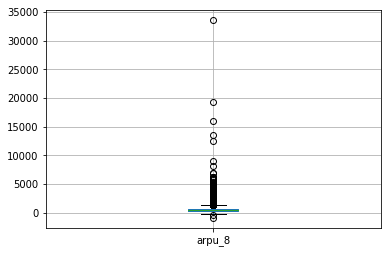

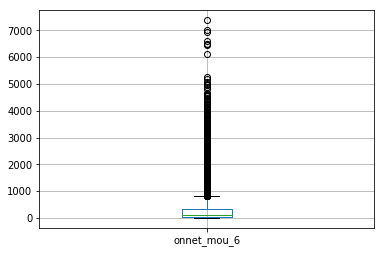

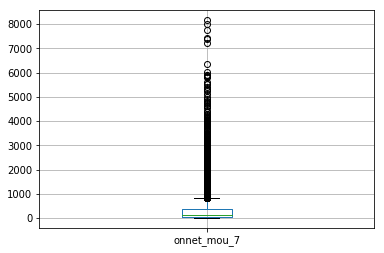

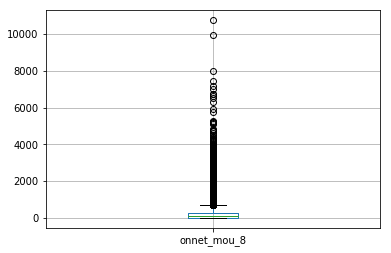

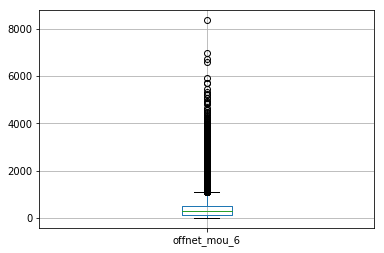

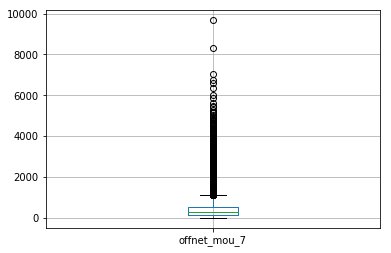

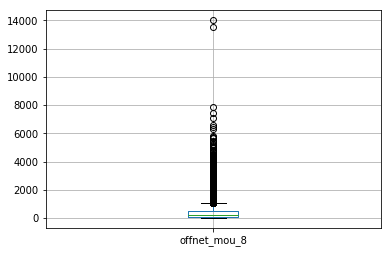

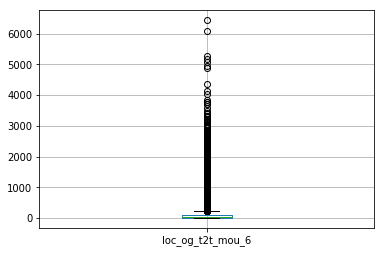

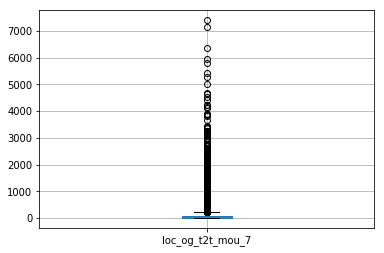

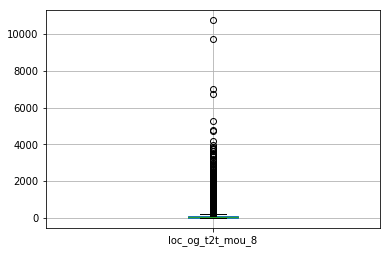

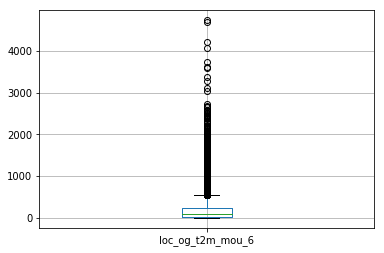

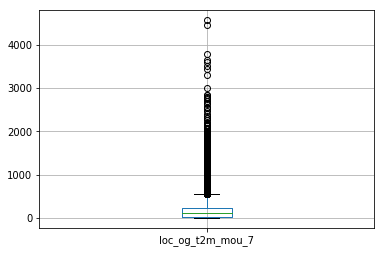

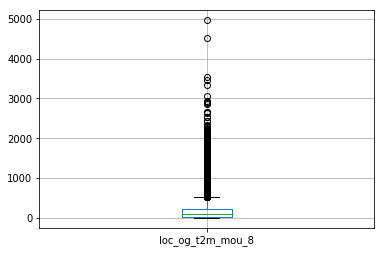

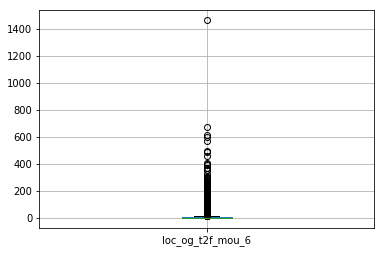

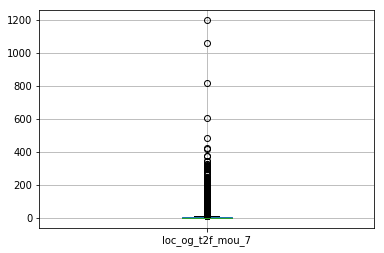

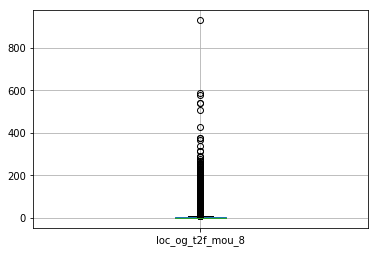

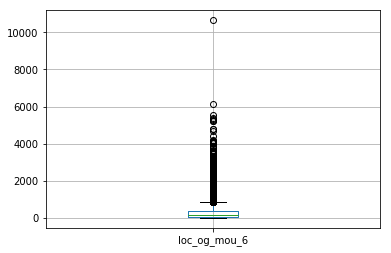

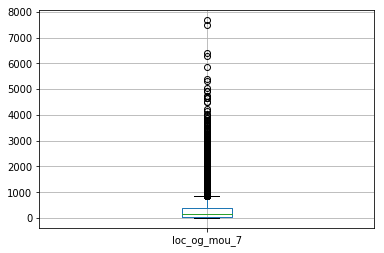

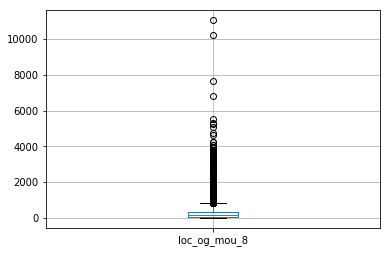

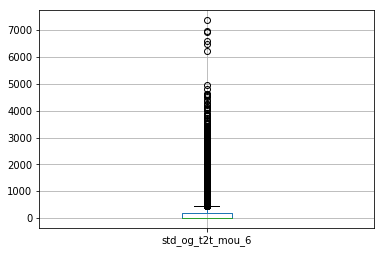

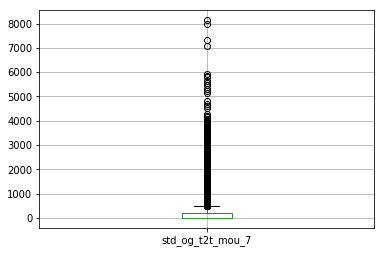

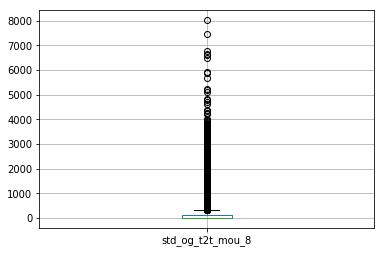

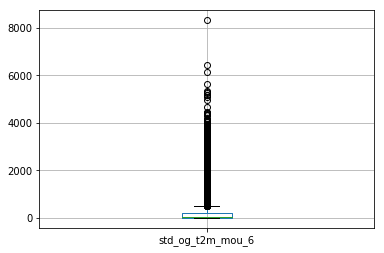

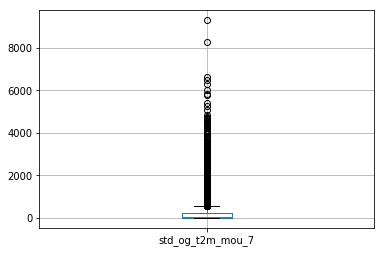

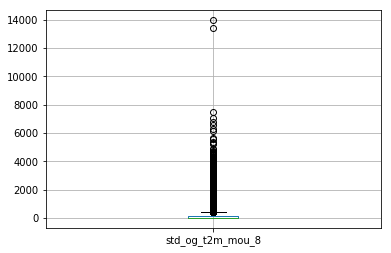

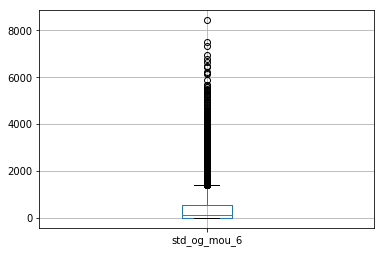

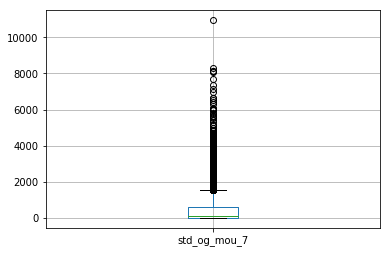

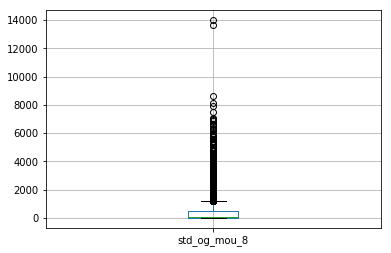

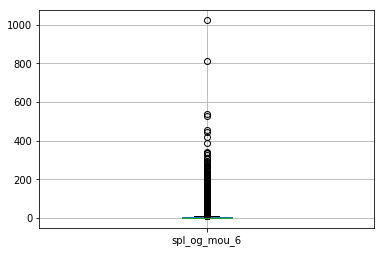

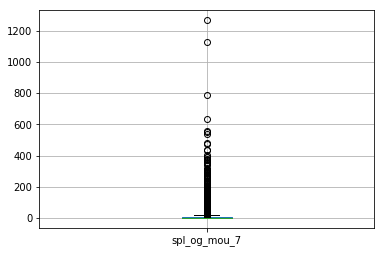

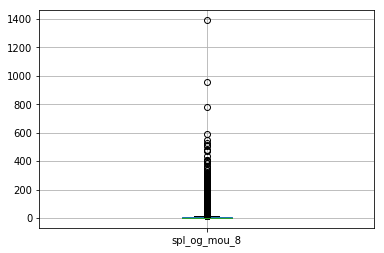

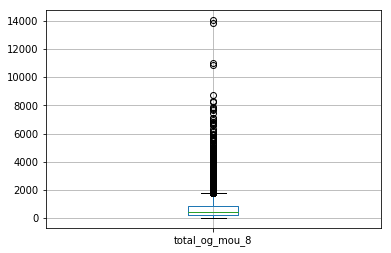

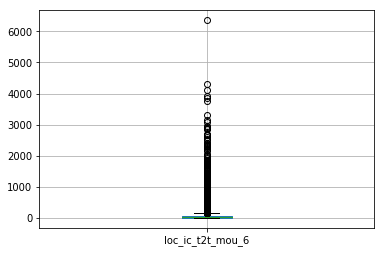

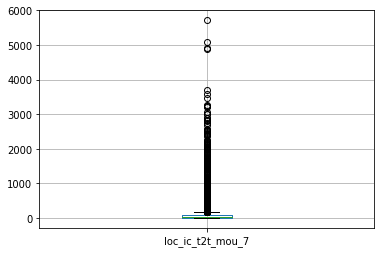

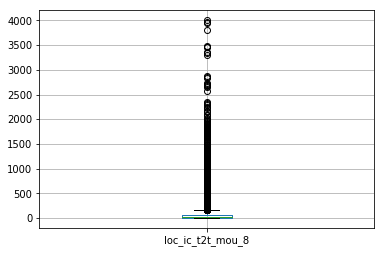

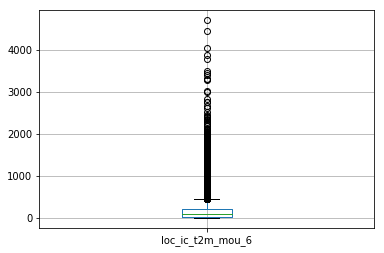

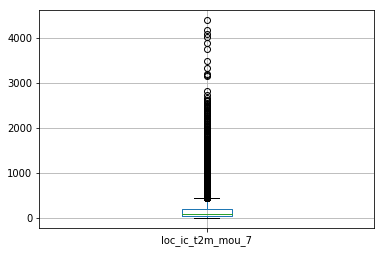

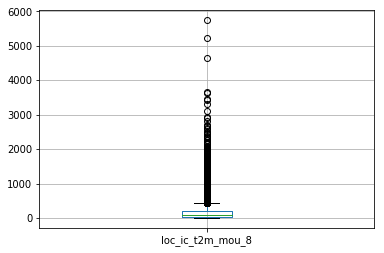

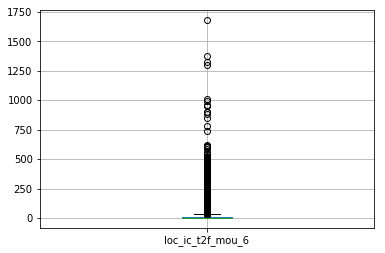

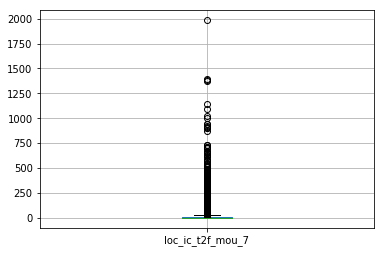

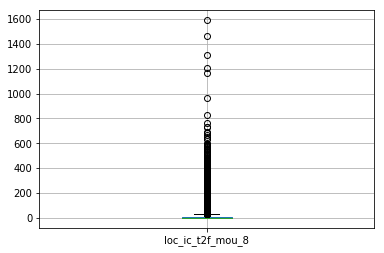

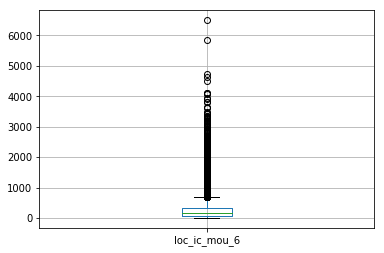

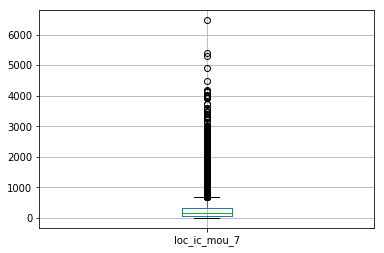

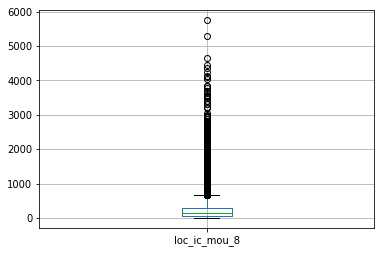

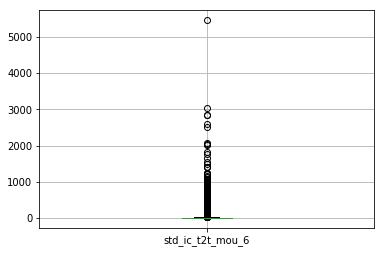

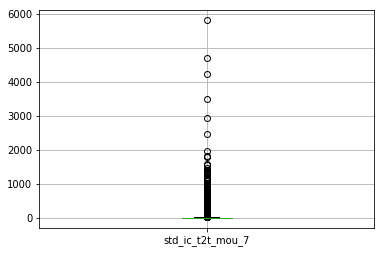

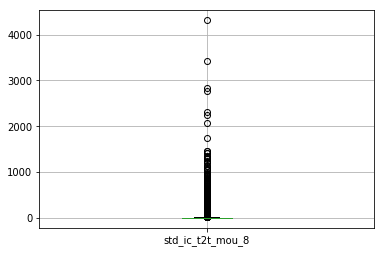

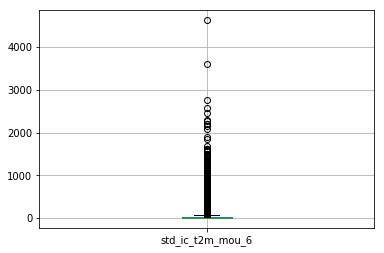

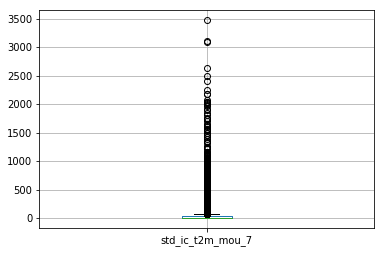

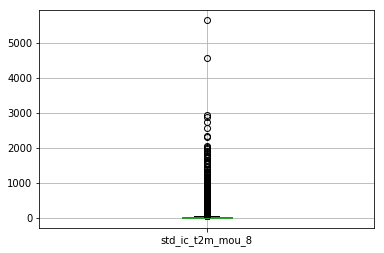

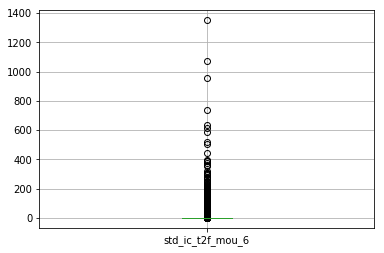

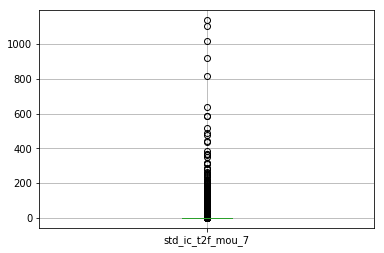

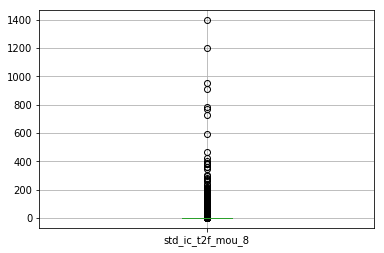

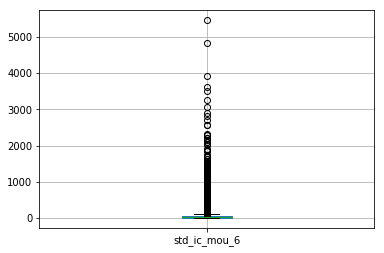

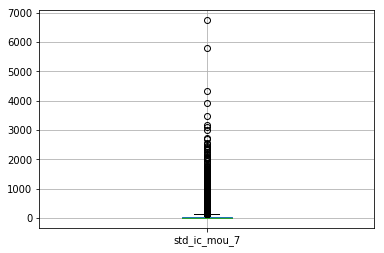

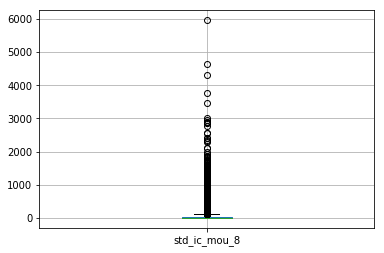

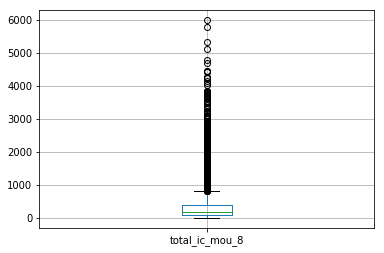

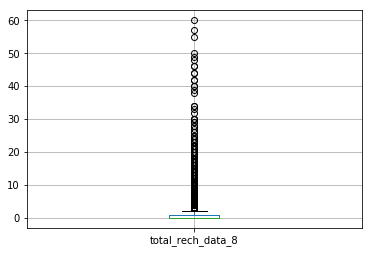

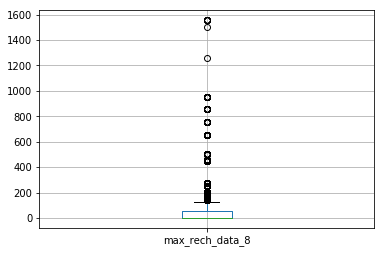

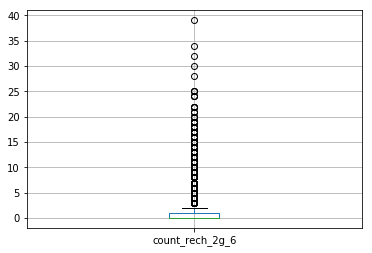

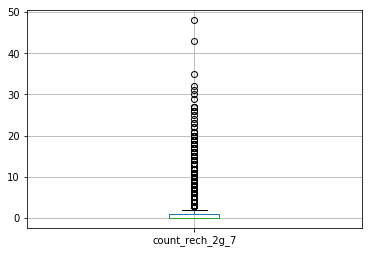

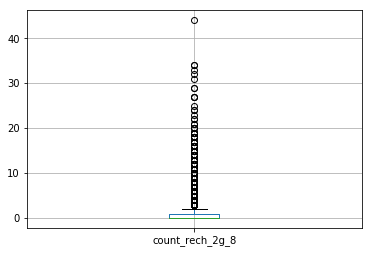

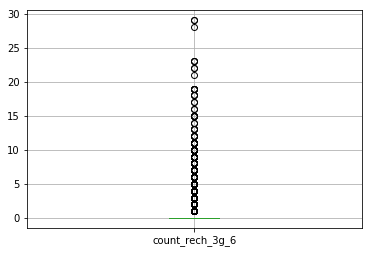

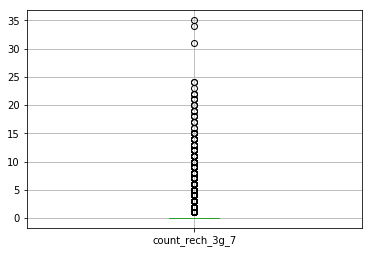

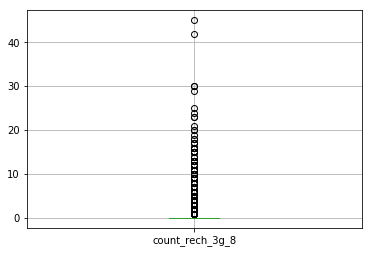

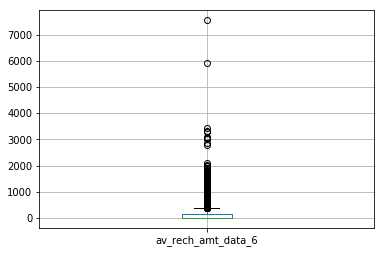

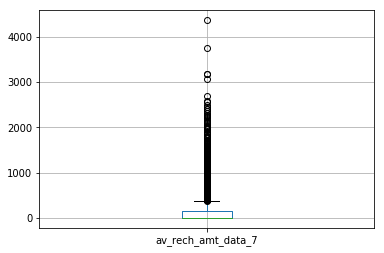

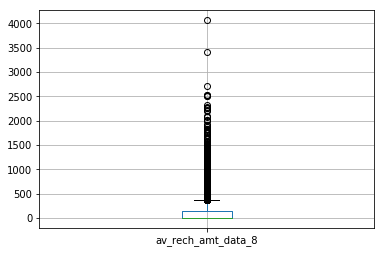

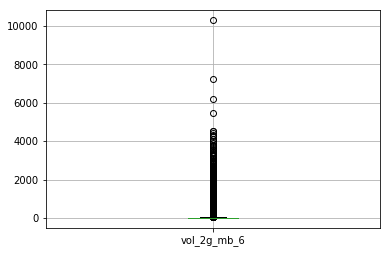

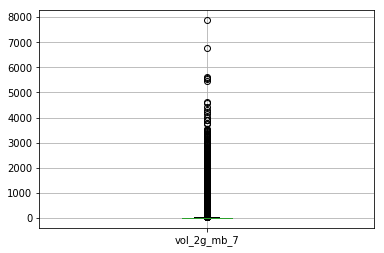

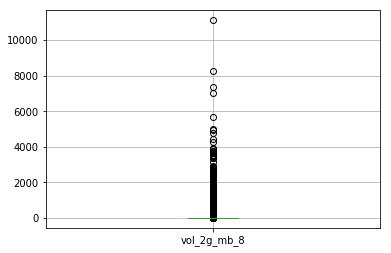

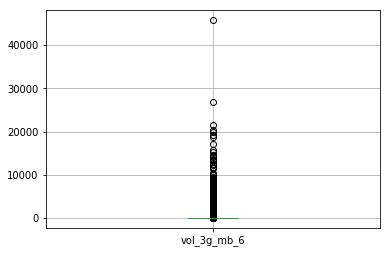

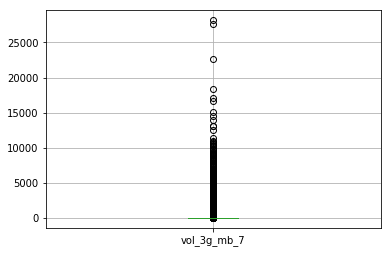

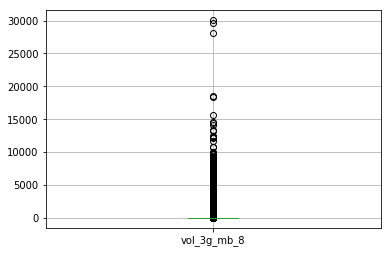

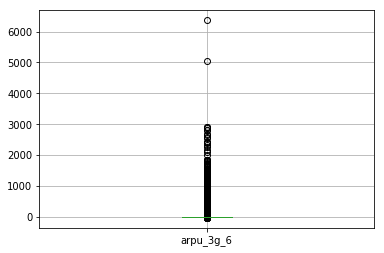

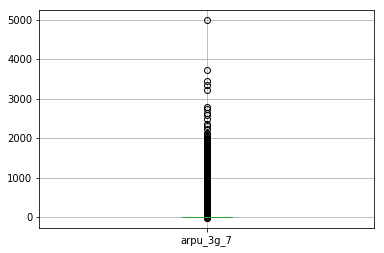

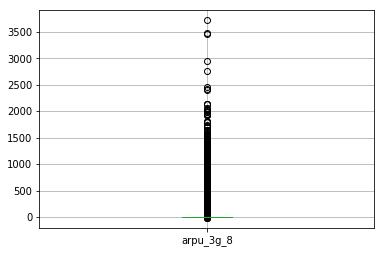

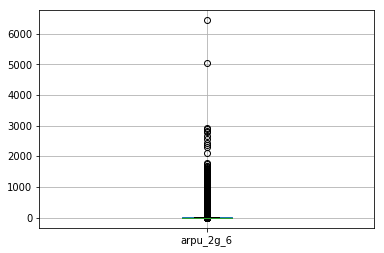

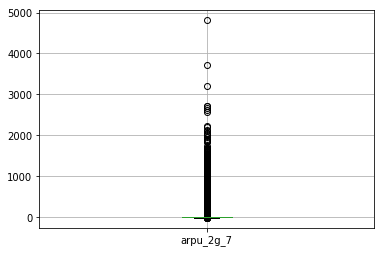

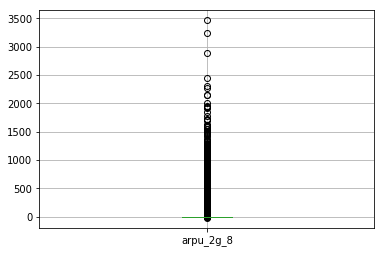

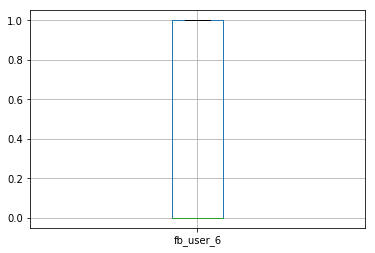

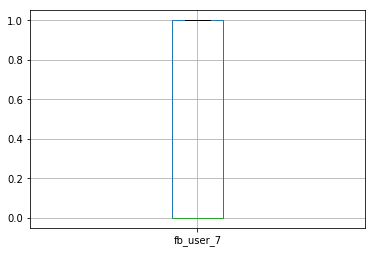

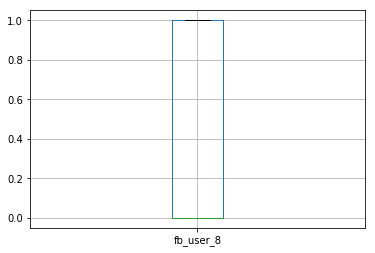

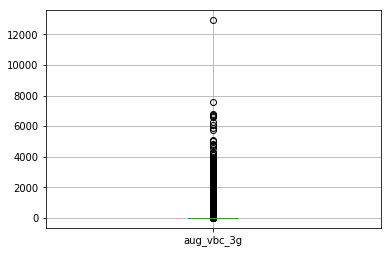

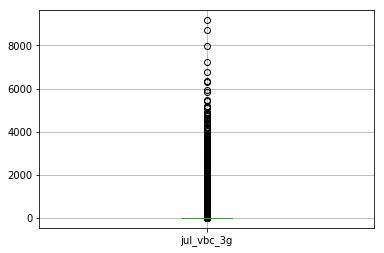

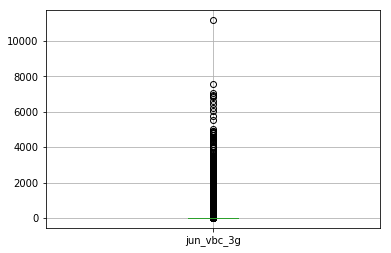

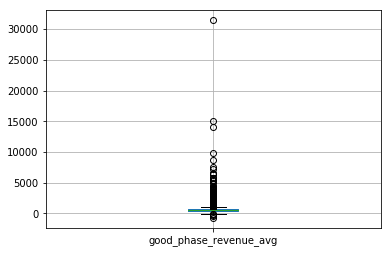

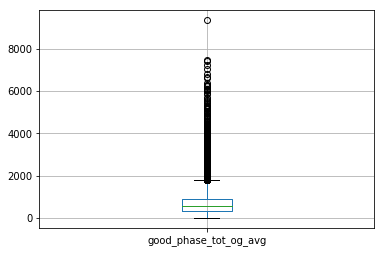

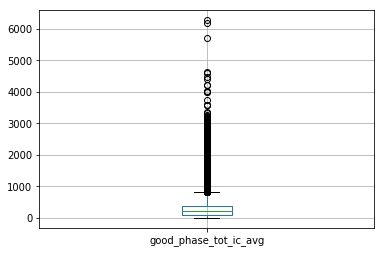

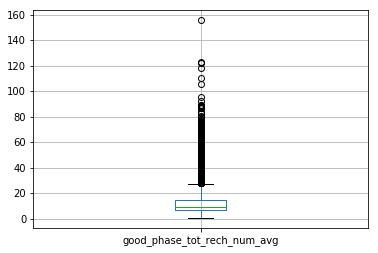

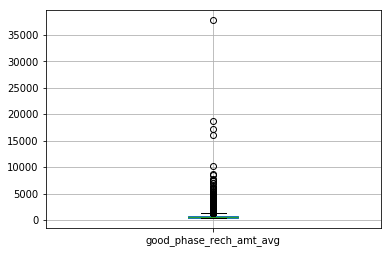

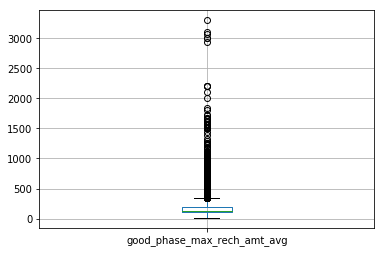

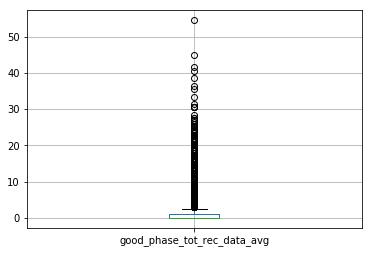

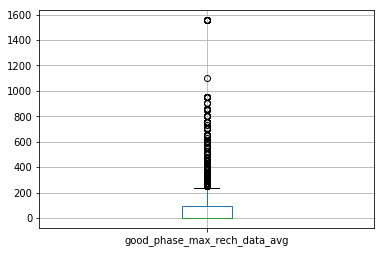

In [59]:
# Plot the BoxPlot for all the flaot columns 
for i in churn_data.select_dtypes(include=['float']).columns:
    churn_data.boxplot(column=i)
    plt.show()

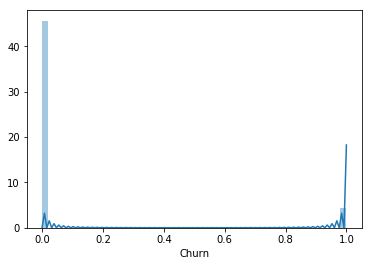

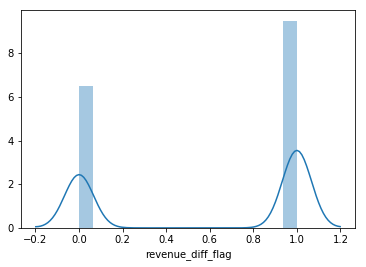

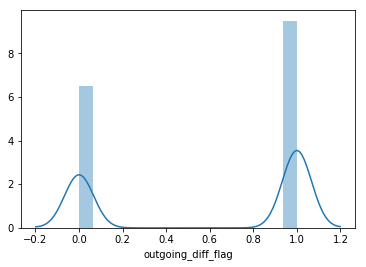

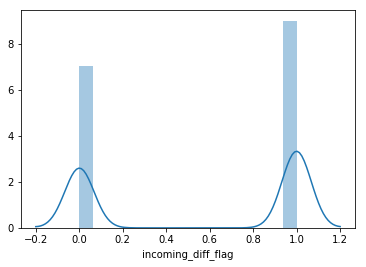

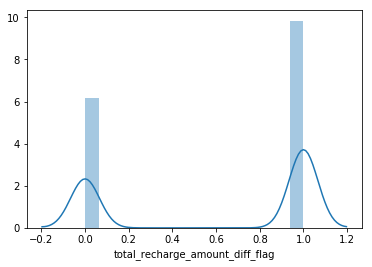

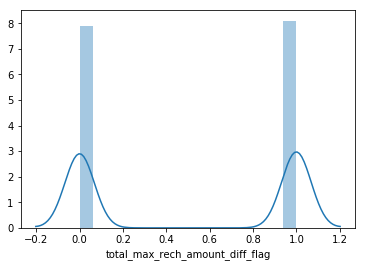

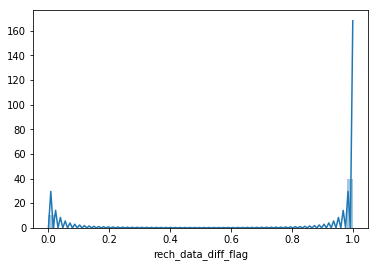

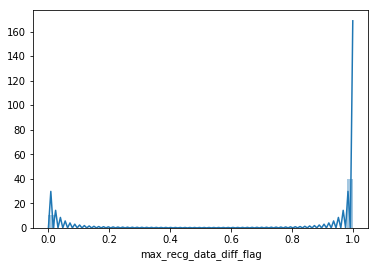

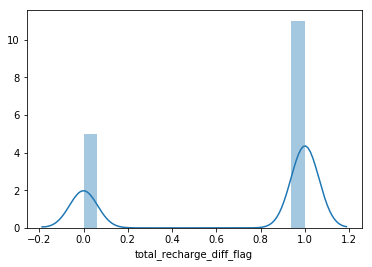

In [60]:
# Check the distplot for the all the int columns
for i, col in enumerate(churn_data.select_dtypes(include=['int']).columns):
    plt.figure(i)
    sns.distplot(churn_data[col])
    plt.show()

In [61]:
# As we can see from the Graph and the dataset, there is a lot of demand in the Evening and Morning
print(churn_data.groupby('revenue_diff_flag')['revenue_diff_flag'].count().sort_values(ascending=False))
print(churn_data.groupby('outgoing_diff_flag')['outgoing_diff_flag'].count().sort_values(ascending=False))
print(churn_data.groupby('incoming_diff_flag')['incoming_diff_flag'].count().sort_values(ascending=False))
print(churn_data.groupby('total_recharge_amount_diff_flag')['total_recharge_amount_diff_flag'].count().sort_values(ascending=False))
print(churn_data.groupby('total_max_rech_amount_diff_flag')['total_max_rech_amount_diff_flag'].count().sort_values(ascending=False))
print(churn_data.groupby('rech_data_diff_flag')['rech_data_diff_flag'].count().sort_values(ascending=False))
print(churn_data.groupby('max_recg_data_diff_flag')['max_recg_data_diff_flag'].count().sort_values(ascending=False))


revenue_diff_flag
1    17766
0    12213
Name: revenue_diff_flag, dtype: int64
outgoing_diff_flag
1    17777
0    12202
Name: outgoing_diff_flag, dtype: int64
incoming_diff_flag
1    16842
0    13137
Name: incoming_diff_flag, dtype: int64
total_recharge_amount_diff_flag
1    18430
0    11549
Name: total_recharge_amount_diff_flag, dtype: int64
total_max_rech_amount_diff_flag
1    15171
0    14808
Name: total_max_rech_amount_diff_flag, dtype: int64
rech_data_diff_flag
1    23809
0     6170
Name: rech_data_diff_flag, dtype: int64
max_recg_data_diff_flag
1    23918
0     6061
Name: max_recg_data_diff_flag, dtype: int64


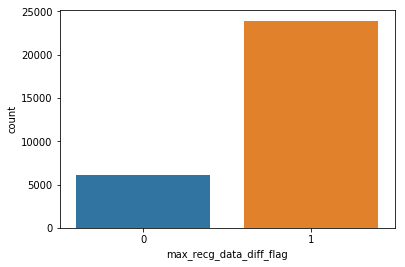

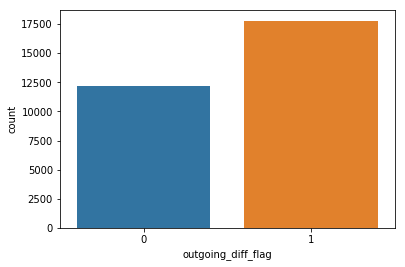

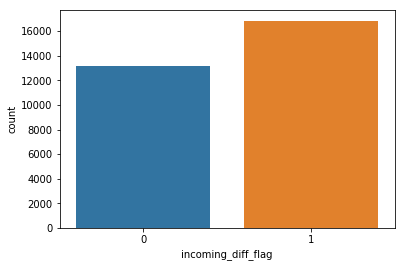

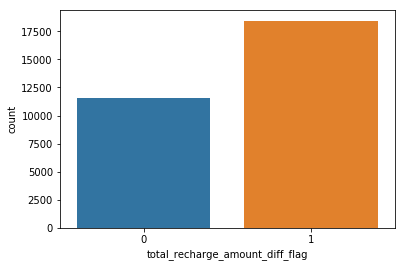

In [62]:
#Check the Counts of the New Calculated Column
sns.countplot(x="max_recg_data_diff_flag", data=churn_data)
plt.show()

sns.countplot(x="outgoing_diff_flag", data=churn_data)
plt.show()

sns.countplot(x="incoming_diff_flag", data=churn_data)
plt.show()

sns.countplot(x="total_recharge_amount_diff_flag", data=churn_data)
plt.show()

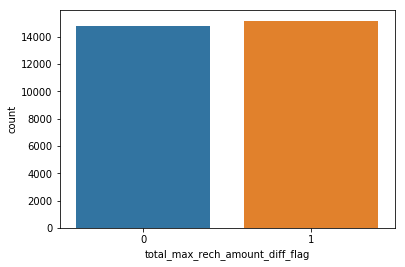

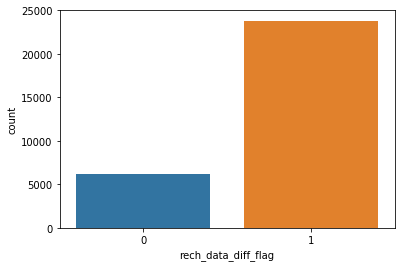

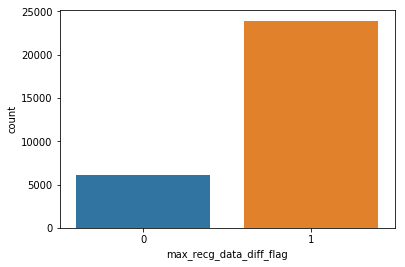

In [63]:
sns.countplot(x="total_max_rech_amount_diff_flag", data=churn_data)
plt.show()

sns.countplot(x="rech_data_diff_flag", data=churn_data)
plt.show()

sns.countplot(x="max_recg_data_diff_flag", data=churn_data)
plt.show()

### We can see the Trend that the Difference is high with all the variables with the difference field having majority 1 values

### Bivariate Analysis

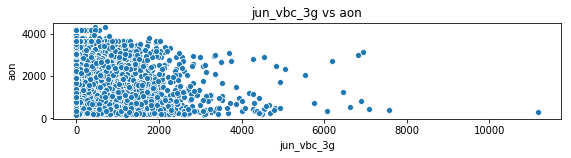

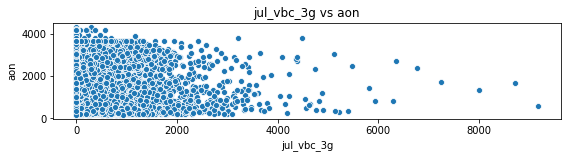

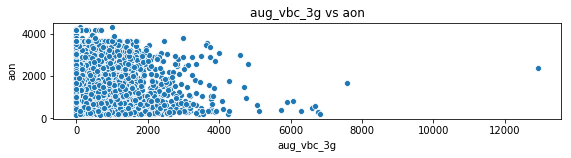

In [64]:
# We are checking if extra value added services have caused the churn or not

plt.figure(figsize=(20, 6))
plt.subplot(3,2,1)
plt.title('jun_vbc_3g vs aon')
sns.scatterplot(x=churn_data['jun_vbc_3g'],y=churn_data.aon)
plt.show()

plt.figure(figsize=(20, 6))
plt.subplot(3,2,2)
plt.title('jul_vbc_3g vs aon')
sns.scatterplot(x=churn_data['jul_vbc_3g'],y=churn_data.aon)
plt.show()

plt.figure(figsize=(20, 6))
plt.subplot(3,2,3)
plt.title('aug_vbc_3g vs aon')
sns.scatterplot(x=churn_data['aug_vbc_3g'],y=churn_data.aon)
plt.show()



### Let us check the correlation among different variables

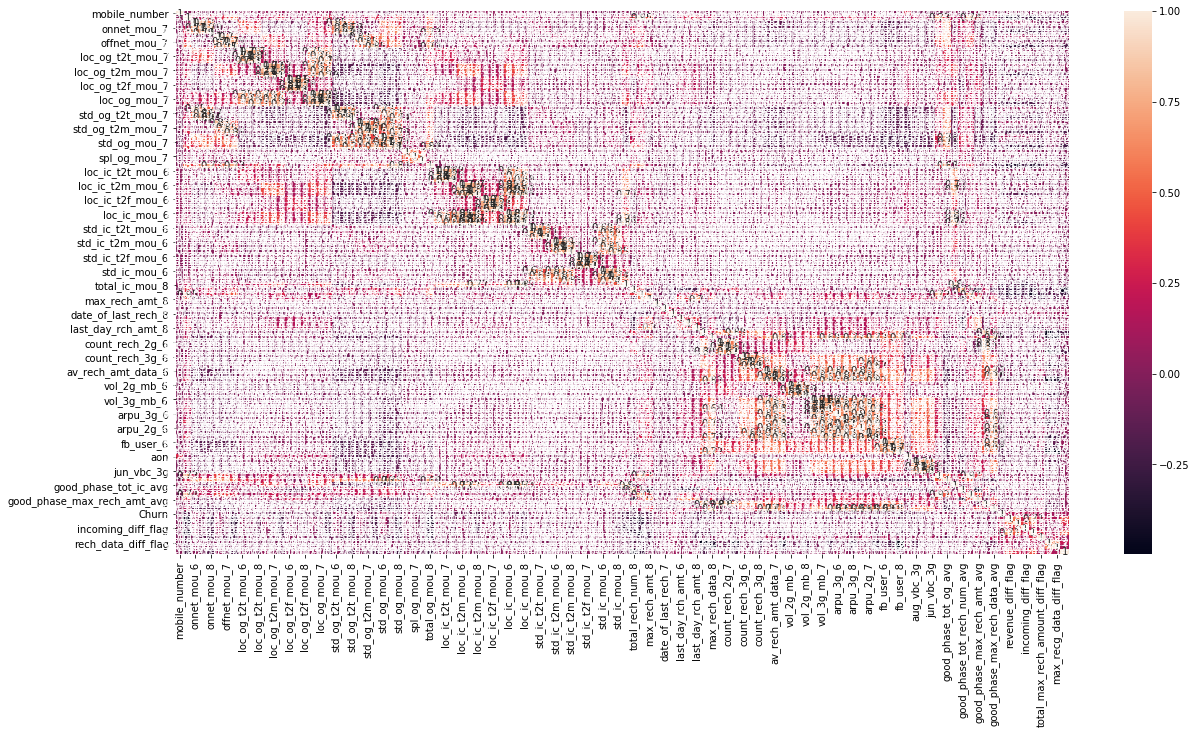

In [65]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(churn_data.corr(),annot = True)
plt.show()

### Let us compare different values 

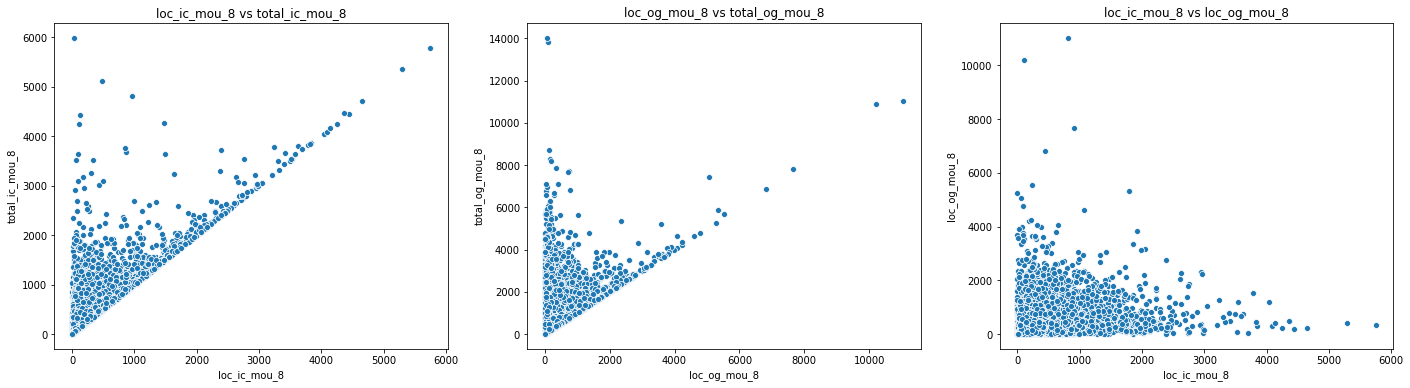

In [66]:
# Compare the Incoming and outgoing calls
plt.figure(figsize=(24, 6))
plt.subplot(1,3,1)
plt.title('loc_ic_mou_8 vs total_ic_mou_8')
sns.scatterplot(x=churn_data.loc_ic_mou_8,y=churn_data.total_ic_mou_8)

plt.subplot(1,3,2)
plt.title('loc_og_mou_8 vs total_og_mou_8')
sns.scatterplot(x=churn_data['loc_og_mou_8'],y=churn_data.total_og_mou_8)

plt.subplot(1,3,3)
plt.title('loc_ic_mou_8 vs loc_og_mou_8')
sns.scatterplot(x=churn_data['loc_ic_mou_8'],y=churn_data.loc_og_mou_8)
plt.show()

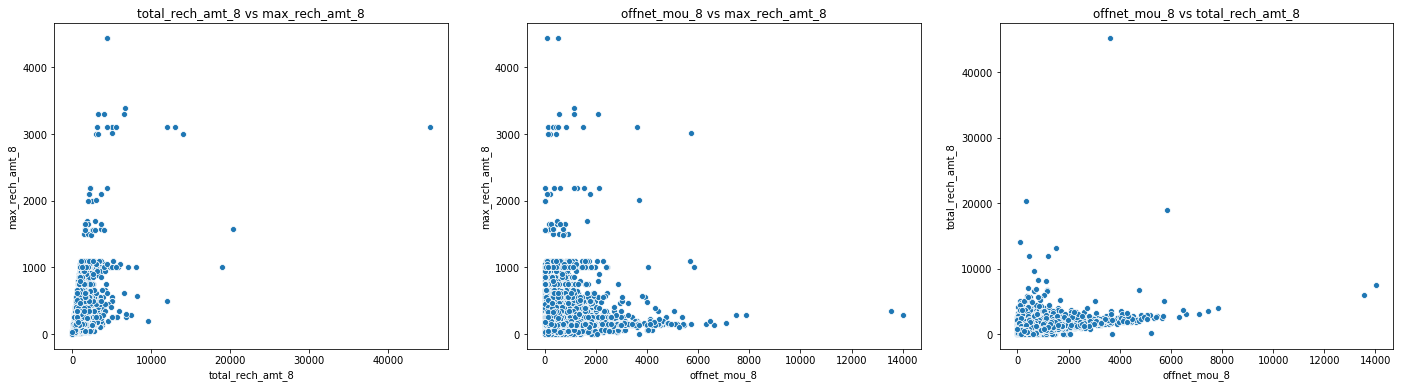

In [67]:
# Compare the Incoming and outgoing internet
plt.figure(figsize=(24, 6))
plt.subplot(1,3,1)
plt.title('total_rech_amt_8 vs max_rech_amt_8')
sns.scatterplot(x=churn_data.total_rech_amt_8,y=churn_data.max_rech_amt_8)

plt.subplot(1,3,2)
plt.title('offnet_mou_8 vs max_rech_amt_8')
sns.scatterplot(x=churn_data['offnet_mou_8'],y=churn_data.max_rech_amt_8)

plt.subplot(1,3,3)
plt.title('offnet_mou_8 vs total_rech_amt_8')
sns.scatterplot(x=churn_data['offnet_mou_8'],y=churn_data.total_rech_amt_8)
plt.show()

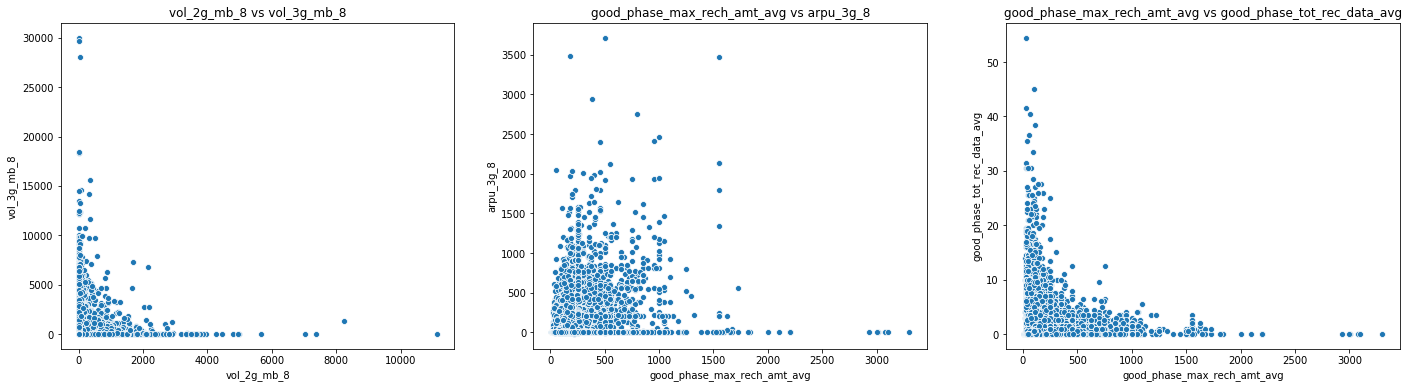

In [68]:
# Compare the Incoming and outgoing internet
plt.figure(figsize=(24, 6))
plt.subplot(1,3,1)
plt.title('vol_2g_mb_8 vs vol_3g_mb_8')
sns.scatterplot(x=churn_data.vol_2g_mb_8,y=churn_data.vol_3g_mb_8)

plt.subplot(1,3,2)
plt.title('good_phase_max_rech_amt_avg vs arpu_3g_8')
sns.scatterplot(x=churn_data['good_phase_max_rech_amt_avg'],y=churn_data.arpu_3g_8)

plt.subplot(1,3,3)
plt.title('good_phase_max_rech_amt_avg vs good_phase_tot_rec_data_avg')
sns.scatterplot(x=churn_data['good_phase_max_rech_amt_avg'],y=churn_data.good_phase_tot_rec_data_avg)
plt.show()

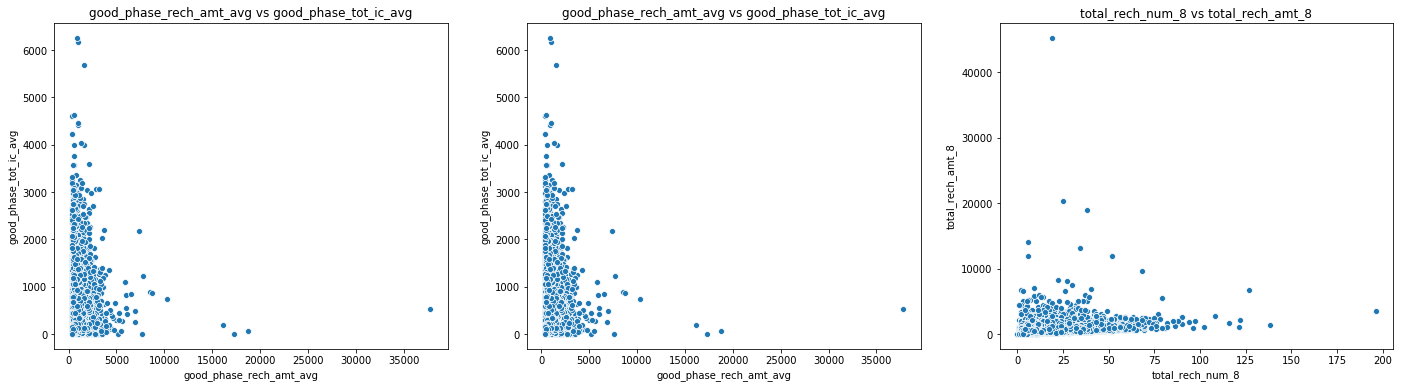

In [69]:
# Compare the Incoming and outgoing internet
plt.figure(figsize=(24, 6))
plt.subplot(1,3,1)
plt.title('good_phase_rech_amt_avg vs good_phase_tot_ic_avg')
sns.scatterplot(x=churn_data.good_phase_rech_amt_avg,y=churn_data.good_phase_tot_ic_avg)

plt.subplot(1,3,2)
plt.title('good_phase_rech_amt_avg vs good_phase_tot_ic_avg')
sns.scatterplot(x=churn_data['good_phase_rech_amt_avg'],y=churn_data.good_phase_tot_ic_avg)

plt.subplot(1,3,3)
plt.title('total_rech_num_8 vs total_rech_amt_8')
sns.scatterplot(x=churn_data['total_rech_num_8'],y=churn_data.total_rech_amt_8)
plt.show()

### We can see that the Incoming Calls, Outgoing Calls, Mobile Internet are important features and are skewed left and right respectively in respective graphs 

## Step 10 : Outlier Treatment

### k-Sigma method

In [70]:
# Picking all the columns which are important for Outlier Treatment
cols = ['arpu_8', 'onnet_mou_6', 'onnet_mou_7','onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7','loc_og_t2m_mou_8', 'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8', 'std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8', 'std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8','spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','total_og_mou_8', 'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8', 'loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'good_phase_revenue_avg', 'good_phase_tot_og_avg', 'good_phase_tot_ic_avg', 'good_phase_tot_rech_num_avg', 'good_phase_rech_amt_avg', 'good_phase_max_rech_amt_avg', 'good_phase_tot_rec_data_avg', 'good_phase_max_rech_data_avg']

In [71]:
# Using sigma as 3, pick the data between mean + 3times Std Dev and Mean - 3 times Std Dev
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array < lower_limit] = lower_limit
    array[array > upper_limit] = upper_limit
    return array

In [72]:
# Cap the Outliers
for col in cols:
    churn_new[col] = cap_outliers(churn_new[col], 3)

## Step 11 : Standard Scalling

In [73]:
# Use Standard Scaler to Scale
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
churn_new[cols]= standard_scaler.fit_transform(churn_new[cols])

In [74]:
# Examine the Dataframe
churn_new.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,...,good_phase_max_rech_data_avg,Churn,revenue_diff_flag,outgoing_diff_flag,incoming_diff_flag,total_recharge_amount_diff_flag,total_max_rech_amount_diff_flag,rech_data_diff_flag,max_recg_data_diff_flag,total_recharge_diff_flag
7,7000701601,4.000447,-0.592512,-0.596478,-0.540581,0.127526,0.396187,-0.088349,-0.225821,-0.367630,...,-0.649306,1,0,1,1,0,0,1,1,0
8,7001524846,-1.041866,0.354807,0.159683,-0.587450,-0.784402,-0.816672,-0.582410,1.511960,0.934186,...,0.252479,0,1,1,1,1,1,0,1,1
13,7002191713,0.184118,0.589261,-0.459432,0.771925,0.025548,-0.720322,0.319955,-0.238267,-0.543736,...,-0.649306,0,0,0,0,0,0,0,0,0
16,7000875565,-0.905977,-0.612025,-0.547156,-0.490690,-0.271895,-0.444959,-0.513868,-0.287910,-0.131470,...,-0.649306,0,1,1,1,1,0,1,1,1
17,7000187447,-1.342683,2.410558,-0.712320,-0.661769,-0.868333,-1.017673,-0.923920,-0.313509,-0.587011,...,-0.649306,0,1,1,1,1,1,1,1,1


## Step 12 : Test- Train Split

In [75]:
#Break the Dataset into test and train
from sklearn.model_selection import train_test_split

In [76]:
# Drop the target variables
X = churn_new.drop(['mobile_number','Churn'], axis=1)

X.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,...,good_phase_tot_rec_data_avg,good_phase_max_rech_data_avg,revenue_diff_flag,outgoing_diff_flag,incoming_diff_flag,total_recharge_amount_diff_flag,total_max_rech_amount_diff_flag,rech_data_diff_flag,max_recg_data_diff_flag,total_recharge_diff_flag
7,4.000447,-0.592512,-0.596478,-0.540581,0.127526,0.396187,-0.088349,-0.225821,-0.367630,-0.273005,...,-0.589142,-0.649306,0,1,1,0,0,1,1,0
8,-1.041866,0.354807,0.159683,-0.587450,-0.784402,-0.816672,-0.582410,1.511960,0.934186,-0.480846,...,0.059231,0.252479,1,1,1,1,1,0,1,1
13,0.184118,0.589261,-0.459432,0.771925,0.025548,-0.720322,0.319955,-0.238267,-0.543736,-0.304940,...,-0.589142,-0.649306,0,0,0,0,0,0,0,0
16,-0.905977,-0.612025,-0.547156,-0.490690,-0.271895,-0.444959,-0.513868,-0.287910,-0.131470,-0.070325,...,-0.589142,-0.649306,1,1,1,1,0,1,1,1
17,-1.342683,2.410558,-0.712320,-0.661769,-0.868333,-1.017673,-0.923920,-0.313509,-0.587011,-0.574258,...,-0.589142,-0.649306,1,1,1,1,1,1,1,1


In [77]:
# Dependent variable
y = churn_new['Churn']

y.head()

7     1
8     0
13    0
16    0
17    0
Name: Churn, dtype: int32

In [78]:
# Create backup variables
X_pca = X
y_pca = y

In [79]:
# Perform the Split
x_train, x_test, y_train, y_test = train_test_split(
    X_pca,
    y_pca,
    train_size=0.7, test_size=0.3, random_state=100
)

## Step 13 : Applying PCA 

#### PCA with Elbow curve

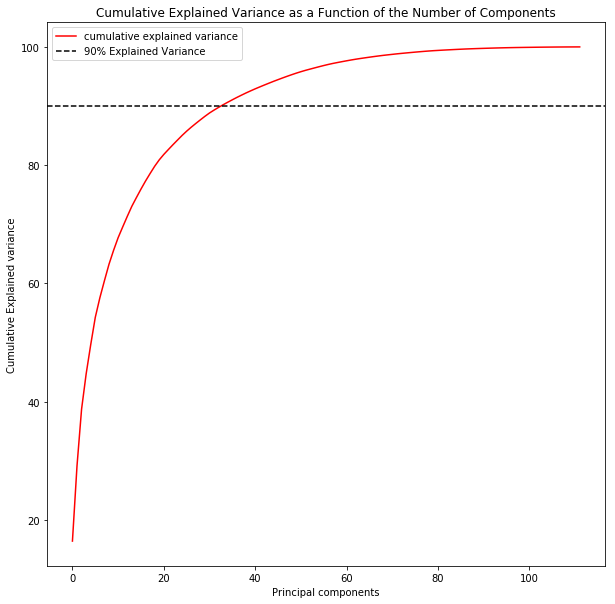

In [80]:
#Using elbow-plot variance/dimensions
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 90, color='k', linestyle='--', label = '90% Explained Variance')
plt.legend(loc='best')
plt.show()

#### Taking Principal components which sums up to 90% cumulative explained variance. As clearly shown in above Elbow plot around 35 PCs corresponds to 90% cummulative variance.

In [81]:
# Import the PCA
from sklearn.decomposition import PCA
pca = PCA(.90) 
pca.fit(x_train)

x_train_pca = pca.transform(x_train)
x_test_pca        = pca.transform(x_test)

## Step 14 : Applying Logistic Regression

#### Using GridSearchCV along with Hyperparameter tuning

In [82]:
# Use GridSearchCV()
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# making skeletal model
logistic_regression = LogisticRegression(n_jobs = -1)

# Set of parameters we want to try for out Model
parameters = { 'C' : [1.1,1.25,1.5, 5, 10, 20, 50, 100]}

#Running the Model with above chosen parameter
grid_search = GridSearchCV(estimator = logistic_regression, param_grid = parameters , scoring = 'accuracy', cv = 3, n_jobs = -1 , verbose = 2)
grid_scores = grid_search.fit(x_train_pca , y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   17.4s finished


In [83]:
print( grid_search.best_score_)
print(grid_search.best_params_)

0.927853228497
{'C': 10}


#### For hyperparameter 20 we got best accuracy of 92.75%. Now building final model with this hyperparameter

In [84]:
# Making the Final Classification model.
logistic_regression = LogisticRegression( C = 20, n_jobs = -1)
logistic_regression.fit(x_train_pca, y_train)

LogisticRegression(C=20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
# Predict the Dataset
lr_train_predict=logistic_regression.predict(x_train_pca)


In [86]:
#Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cf= confusion_matrix(y_train, lr_train_predict)

#### Precision, Recall and f1-score report

In [87]:
# Check the Precision, Recall and other parameters
import sklearn.metrics as skm
print(skm.classification_report( y_train , lr_train_predict ))

             precision    recall  f1-score   support

          0       0.94      0.99      0.96     19211
          1       0.68      0.28      0.39      1774

avg / total       0.91      0.93      0.91     20985



In [88]:
#Print the Accuracy
k = logistic_regression.score(x_train_pca, y_train)
print('the Accuracy on the Training set come out to be : ' + str(k))

the Accuracy on the Training set come out to be : 0.927662616154


In [89]:
# Create the Predictor Variables
predict = logistic_regression.predict(x_test_pca)
print(predict)

[0 0 0 ..., 0 0 0]


In [90]:
# predict probabilities
probs = logistic_regression.predict_proba(x_test_pca)

In [91]:
# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [92]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

AUC: 0.888


#### Logistic Regression AUC Score - 89%

### Logistic Regression ROC Curve

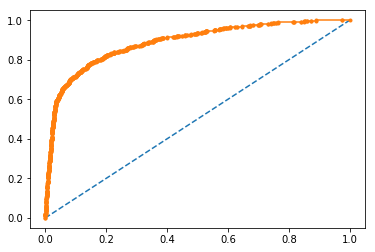

In [93]:
from matplotlib import pyplot
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [94]:
k = logistic_regression.score(x_test_pca, y_test)
print('the Accuracy on the Test set come out to be : ' + str(k))

the Accuracy on the Test set come out to be : 0.921392039137


#### Logistic Regression Accuracy ~ 92%

### Logistic Regression Confusion Metrics and Classification Report

In [95]:
import sklearn.metrics as skm
print(skm.classification_report( y_test , predict ))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96      8179
          1       0.67      0.26      0.38       815

avg / total       0.91      0.92      0.91      8994



In [96]:
#Calculate the other metrics

TP = cf[1,1] # true positive 
TN = cf[0,0] # true negatives
FP = cf[0,1] # false positives
FN = cf[1,0] # false negatives

In [97]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.27564825253664038

In [98]:
# Let us calculate specificity
TN / float(TN+FP)

0.98787153193482902

In [99]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0121284680652


In [100]:
# positive predictive value 
print (TP / float(TP+FP))

0.67728531856


In [101]:
# Negative predictive value
print (TN / float(TN+ FN))

0.936583921433


### AUC score for Logistic Regression is 89% and Accuracy is 92%

## Step 15 : Applying Random Forest

In [102]:
# Importing random forest classifier from sklearn library
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [103]:
# Fit the Models 
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [104]:
# Making predictions
predictions = rfc.predict(x_test)

In [105]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [106]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.94      0.98      0.96      8179
          1       0.73      0.42      0.54       815

avg / total       0.93      0.93      0.93      8994



In [107]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8048  131]
 [ 469  346]]


In [108]:
print(accuracy_score(y_test,predictions))

0.933288859239


### Hyper parameter tuning for Random Forest

#### Tuning Max depth

In [109]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [110]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.231366,0.008925,0.939052,0.939898,2,{'max_depth': 2},4,0.935684,0.941145,0.933286,...,0.940672,0.939898,0.944484,0.938885,0.941134,0.938472,0.024400,0.001069,0.004027,0.001099
1,0.605028,0.010429,0.940863,0.947308,7,{'max_depth': 7},1,0.936398,0.947995,0.935907,...,0.942578,0.946748,0.947343,0.946867,0.942088,0.947049,0.006219,0.001501,0.004265,0.000524
2,0.877078,0.012330,0.940005,0.971599,12,{'max_depth': 12},2,0.939019,0.971585,0.935907,...,0.939004,0.973433,0.944246,0.969979,0.941849,0.971291,0.059216,0.000876,0.002834,0.001104
3,1.031031,0.013838,0.940005,0.989981,17,{'max_depth': 17},2,0.936636,0.992018,0.935430,...,0.943531,0.989695,0.943531,0.989218,0.940896,0.989338,0.083209,0.001032,0.003404,0.001034


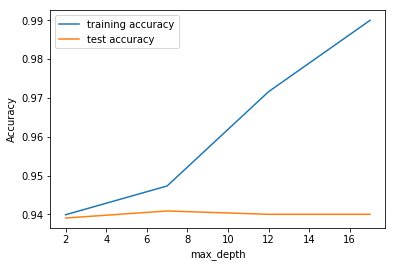

In [111]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Max depth 7 

In [112]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.231366,0.008925,0.939052,0.939898,2,{'max_depth': 2},4,0.935684,0.941145,0.933286,...,0.940672,0.939898,0.944484,0.938885,0.941134,0.938472,0.024400,0.001069,0.004027,0.001099
1,0.605028,0.010429,0.940863,0.947308,7,{'max_depth': 7},1,0.936398,0.947995,0.935907,...,0.942578,0.946748,0.947343,0.946867,0.942088,0.947049,0.006219,0.001501,0.004265,0.000524
2,0.877078,0.012330,0.940005,0.971599,12,{'max_depth': 12},2,0.939019,0.971585,0.935907,...,0.939004,0.973433,0.944246,0.969979,0.941849,0.971291,0.059216,0.000876,0.002834,0.001104
3,1.031031,0.013838,0.940005,0.989981,17,{'max_depth': 17},2,0.936636,0.992018,0.935430,...,0.943531,0.989695,0.943531,0.989218,0.940896,0.989338,0.083209,0.001032,0.003404,0.001034


### Tuning Max features

In [113]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [4, 8, 14, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [114]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_features,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.200043,0.009024,0.939099,0.941172,4,{'max_features': 4},5,0.935207,0.942217,0.935192,...,0.942102,0.940791,0.942578,0.938647,0.940419,0.941152,0.017284,0.000635,0.003264,0.001494
1,0.330537,0.009829,0.941768,0.942816,8,{'max_features': 8},4,0.938066,0.944123,0.935430,...,0.944246,0.942459,0.947105,0.940791,0.943994,0.942403,0.032325,0.001170,0.004323,0.001290
2,0.475609,0.008015,0.942054,0.942769,14,{'max_features': 14},2,0.938780,0.943349,0.936621,...,0.943055,0.942399,0.948296,0.941089,0.943518,0.942522,0.026520,0.001055,0.004058,0.001122
3,0.626922,0.008324,0.942387,0.942828,20,{'max_features': 20},1,0.939257,0.943528,0.936383,...,0.943769,0.942280,0.948535,0.941327,0.943994,0.942105,0.014443,0.000602,0.004198,0.001254
4,0.791272,0.009527,0.941959,0.942959,24,{'max_features': 24},3,0.938542,0.943409,0.935907,...,0.943531,0.942638,0.948296,0.941327,0.943518,0.943118,0.007987,0.000896,0.004321,0.000980


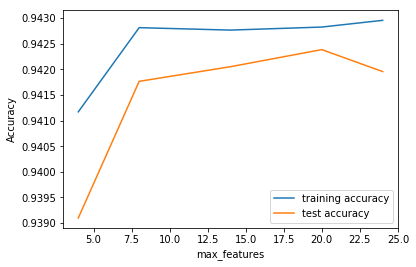

In [115]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Max_features = 7.5

### Tuning Min_Samples_Leaves

In [116]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [117]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_leaf,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.714858,0.010931,0.941244,0.942316,100,{'min_samples_leaf': 100},1,0.938542,0.943468,0.936145,...,0.942102,0.942459,0.946867,0.940851,0.942564,0.940914,0.052434,0.001359,0.003671,0.001260
1,0.698412,0.010831,0.939909,0.940386,150,{'min_samples_leaf': 150},4,0.935207,0.941681,0.934239,...,0.941387,0.939659,0.946152,0.938647,0.942564,0.940318,0.039181,0.001170,0.004527,0.001164
2,0.595265,0.010829,0.940720,0.941065,200,{'min_samples_leaf': 200},2,0.935445,0.942277,0.935668,...,0.942816,0.940076,0.947343,0.940553,0.942326,0.940318,0.043416,0.001473,0.004565,0.000932
3,0.535933,0.009624,0.940195,0.940231,250,{'min_samples_leaf': 250},3,0.935684,0.941741,0.935907,...,0.940434,0.939064,0.947105,0.939659,0.941849,0.938472,0.032562,0.000490,0.004226,0.001485
4,0.556295,0.010227,0.938003,0.939064,300,{'min_samples_leaf': 300},6,0.935207,0.940668,0.934477,...,0.937574,0.937813,0.943293,0.938468,0.939466,0.937042,0.012823,0.001169,0.003180,0.001656


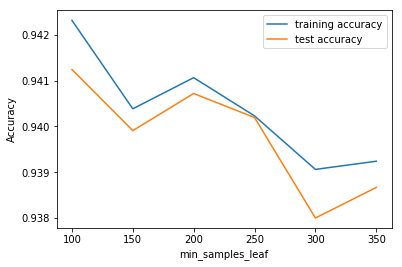

In [118]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### min_samples_leaf = 200

### Tuning samples split

In [119]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [120]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.971186,0.012537,0.941720,0.942935,200,{'min_samples_split': 200},3,0.937113,0.942813,0.936621,...,0.943769,0.943055,0.946867,0.942161,0.944233,0.941926,0.053441,0.002002,0.004104,0.000984
1,0.971141,0.012434,0.942149,0.943043,250,{'min_samples_split': 250},1,0.939971,0.943766,0.936145,...,0.943055,0.942816,0.948296,0.941446,0.943279,0.942165,0.058533,0.001360,0.004017,0.001249
2,0.920461,0.011331,0.941816,0.942161,300,{'min_samples_split': 300},2,0.935922,0.941383,0.936860,...,0.943769,0.941804,0.948296,0.940315,0.944233,0.942879,0.041785,0.001080,0.004711,0.001399
3,0.901334,0.010930,0.940815,0.942018,350,{'min_samples_split': 350},5,0.936875,0.942158,0.934715,...,0.941863,0.941268,0.946629,0.940731,0.943994,0.942701,0.059963,0.000665,0.004421,0.000914
4,0.925344,0.011716,0.940243,0.941911,400,{'min_samples_split': 400},6,0.936636,0.942098,0.934954,...,0.941863,0.941029,0.944484,0.939302,0.943279,0.942403,0.065380,0.001732,0.003763,0.001776


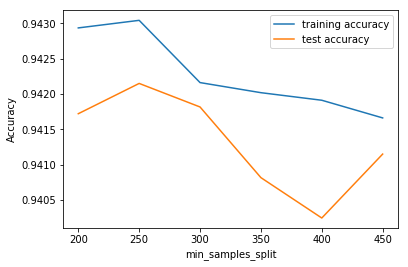

In [121]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### min samples split = 250

**Fitting the final model with the best parameters obtained from grid search.**

In [122]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=200, 
                             min_samples_split=250,
                             max_features=8,
                             n_estimators=500)

In [123]:
# fit
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=200, min_samples_split=250,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [124]:
# predict
predictions = rfc.predict(x_test)

In [125]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

## Random forest classification report - Precision, Recall, f1-score 

In [126]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      8179
          1       0.77      0.45      0.57       815

avg / total       0.93      0.94      0.93      8994



In [127]:
print(confusion_matrix(y_test,predictions))

[[8067  112]
 [ 449  366]]


In [128]:
print(accuracy_score(y_test,predictions))

0.937625083389


## Random Forest Accuracy is 93.7%

### Confusion Matrix

In [129]:
#Making the confusion Matrix

from sklearn.metrics import confusion_matrix
cf= confusion_matrix(y_test, predictions)

In [130]:
TP = cf[1,1] # true positive 
TN = cf[0,0] # true negatives
FP = cf[0,1] # false positives
FN = cf[1,0] # false negatives

In [131]:
# Let's see the sensitivity of our model
TP / float(TP+FN)

0.44907975460122701

In [132]:
# Let us calculate specificity
TN / float(TN+FP)

0.98630639442474632

In [133]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0136936055753


In [134]:
# positive predictive value 
print (TP / float(TP+FP))

0.765690376569


In [135]:
# Negative predictive value
print (TN / float(TN+ FN))

0.947275716299


In [136]:
# predict probabilities
probs = rfc.predict_proba(x_test)


In [137]:
# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [138]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

AUC: 0.898


## Random Forest AUC score is 89.8%

#### Random Forest ROC Curve

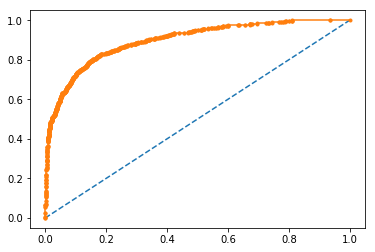

In [139]:
from matplotlib import pyplot
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

### Random Forest AUC score is 89.7% and Accuracy is 93.7%

In [140]:
feature_importances = pd.DataFrame(rfc.feature_importances_, index = x_train.columns, columns = ['importance']).sort_values('importance', ascending = False)

### Arranging features with very high importance

In [141]:
# Final Features
final_features = feature_importances.head(35)

## Checking the Top 35 Features

In [142]:
#Check the Final Features
final_features

,importance
loc_ic_t2m_mou_8,0.101972
total_ic_mou_8,0.098901
loc_ic_mou_8,0.094989
total_og_mou_8,0.093633
loc_og_t2m_mou_8,0.074623
loc_og_mou_8,0.065301
arpu_8,0.063768
loc_ic_t2t_mou_8,0.049209
total_rech_amt_8,0.041728
onnet_mou_8,0.032639


### We can clearly see that Majority of the Features are from the Action Phase (Month 8)
### Clearly Incoming Calls, Outgoing Calls, Internet Usage and Social Media Usage are the Major Parameters that cause a customer to churn